<a href="https://colab.research.google.com/github/Rajat0099/Asthma-Detection-Model/blob/main/New1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Streaming output truncated to the last 5000 lines.
Person 414 is asthmatic.
Person 415 is asthmatic.
Person 416 is asthmatic.
Person 417 is asthmatic.
Person 418 is asthmatic.
Person 419 is asthmatic.
Person 420 is asthmatic.
Person 421 is asthmatic.
Person 422 is not asthmatic.
Person 423 is asthmatic.
Person 424 is asthmatic.
Person 425 is not asthmatic.
Person 426 is asthmatic.
Person 427 is asthmatic.
Person 428 is asthmatic.
Person 429 is asthmatic.
Person 430 is asthmatic.
Person 431 is not asthmatic.
Person 432 is asthmatic.
Person 433 is asthmatic.
Person 434 is asthmatic.
Person 435 is asthmatic.
Person 436 is asthmatic.
Person 437 is asthmatic.
Person 438 is not asthmatic.
Person 439 is asthmatic.
Person 440 is asthmatic.
Person 441 is not asthmatic.
Person 442 is asthmatic.
Person 443 is asthmatic.
Person 444 is asthmatic.
Person 445 is asthmatic.
Person 446 is asthmatic.
Person 447 is asthmatic.
Person 448 is asthmatic.
Person 449 is asthmatic.
Person 450 is asthmatic.
Pers

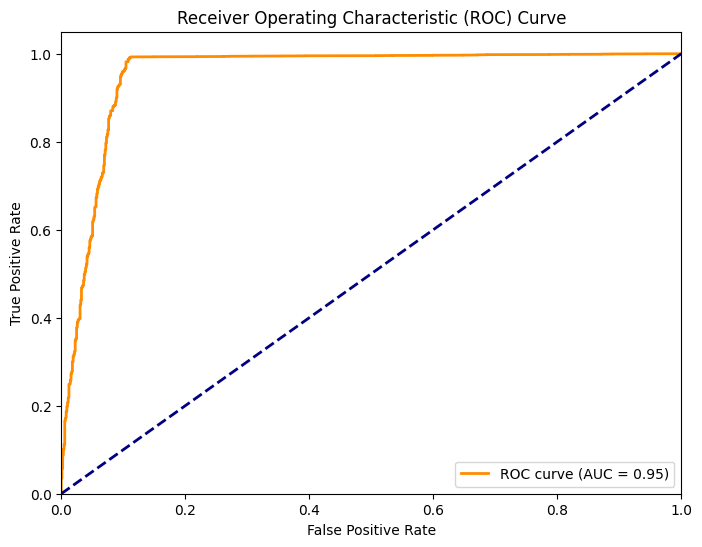

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset
data = pd.read_csv("Sample.csv")

# Select the relevant features (columns)
features = [
    'ALCDAY5', 'X_AGE_G', 'SMOKE100', 'SMOKDAY2', 'SEX',
    'X_HISPANC', 'X_MRACE1', 'MARITAL', 'GENHLTH', 'HLTHPLN1', 'EDUCA',
    'INCOME2', 'X_BMI5CAT', 'EXERANY2', 'ALCGRP', 'DRKWEEKLY', 'ASTHMA4',
    'AGE2','AGE3','AGE4','AGE5','AGE6','NEVERSMK'
]

# Create X (features) and y (target) datasets
X = data[features]
y = data['ASTHMA3']

# Convert labels 1 to 0 and 2 to 1
y = [0 if label == 1 else 1 for label in y]

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize a Random Forest Classifier with hyperparameter tuning
param_grid = {
    'n_estimators': [100],  # You can experiment with other values
    'max_depth': [10],      # Adjust max_depth as needed
    'min_samples_split': [5],
    'min_samples_leaf': [2]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_rf_model = grid_search.best_estimator_

# Step 4: Make predictions for the user input data
input_data = pd.read_csv("Testing.csv")
user_predictions = best_rf_model.predict(input_data[features])

# Step 5: Store the results in a new CSV file
result_df = pd.DataFrame({'Prediction': user_predictions})
result_df.to_csv("RF_results.csv", index=False)

# Step 6: Print whether the person is asthmatic or not based on the model's predictions
for i, prediction in enumerate(user_predictions):
    if prediction == 1:
        print(f"Person {i+1} is asthmatic.")
    else:
        print(f"Person {i+1} is not asthmatic.")

# Step 7: Calculate and print the overall accuracy of the model on the test set
accuracy = accuracy_score(y_test, best_rf_model.predict(X_test))
print(f"Overall accuracy of the model on the test set: {accuracy * 100:.2f}%")

# Calculate ROC curve and AUC
y_proba = best_rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Load and preprocess the dataset
data = pd.read_csv("Synthetic data.csv")

# Select the relevant features (columns)
features = [
    'ALCDAY5', 'X_AGE_G', 'SMOKE100', 'SMOKDAY2', 'SEX',
    'X_HISPANC', 'X_MRACE1', 'MARITAL', 'GENHLTH', 'HLTHPLN1', 'EDUCA',
    'INCOME2', 'X_BMI5CAT', 'EXERANY2', 'ALCGRP', 'DRKWEEKLY', 'ASTHMA4','AGE2','AGE3','AGE4','AGE5','AGE6','NEVERSMK'
]

# Create X (features) and y (target) datasets
X = data[features]
y = data['ASTHMA3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train a machine learning model (Logistic Regression)
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Step 3: Load user input data from "input.csv"
input_data = pd.read_csv("Testing.csv")

# Step 4: Make predictions for the user input data
user_predictions = model.predict(input_data[features])

# Step 5: Store the results in a new CSV file
result_df = pd.DataFrame({'Prediction': user_predictions})
result_df.to_csv("LogisticRegression_results.csv", index=False)

# Step 6: Print whether the person is asthmatic or not based on the model's predictions
for i, prediction in enumerate(user_predictions):
    if prediction == 1:
        print(f"Person {i+1} is asthmatic.")
    else:
        print(f"Person {i+1} is not asthmatic.")

# Step 7: Calculate and print the overall accuracy of the model
accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Overall accuracy of the model: {accuracy * 100:.2f}%")


Streaming output truncated to the last 5000 lines.
Person 414 is not asthmatic.
Person 415 is not asthmatic.
Person 416 is not asthmatic.
Person 417 is not asthmatic.
Person 418 is not asthmatic.
Person 419 is not asthmatic.
Person 420 is not asthmatic.
Person 421 is not asthmatic.
Person 422 is asthmatic.
Person 423 is not asthmatic.
Person 424 is not asthmatic.
Person 425 is asthmatic.
Person 426 is not asthmatic.
Person 427 is not asthmatic.
Person 428 is not asthmatic.
Person 429 is not asthmatic.
Person 430 is not asthmatic.
Person 431 is asthmatic.
Person 432 is not asthmatic.
Person 433 is not asthmatic.
Person 434 is not asthmatic.
Person 435 is not asthmatic.
Person 436 is not asthmatic.
Person 437 is not asthmatic.
Person 438 is asthmatic.
Person 439 is not asthmatic.
Person 440 is not asthmatic.
Person 441 is asthmatic.
Person 442 is not asthmatic.
Person 443 is not asthmatic.
Person 444 is not asthmatic.
Person 445 is not asthmatic.
Person 446 is not asthmatic.
Person 447 i

Streaming output truncated to the last 5000 lines.
Person 414 is not asthmatic.
Person 415 is not asthmatic.
Person 416 is not asthmatic.
Person 417 is not asthmatic.
Person 418 is not asthmatic.
Person 419 is not asthmatic.
Person 420 is not asthmatic.
Person 421 is not asthmatic.
Person 422 is asthmatic.
Person 423 is not asthmatic.
Person 424 is not asthmatic.
Person 425 is not asthmatic.
Person 426 is not asthmatic.
Person 427 is not asthmatic.
Person 428 is not asthmatic.
Person 429 is not asthmatic.
Person 430 is not asthmatic.
Person 431 is asthmatic.
Person 432 is not asthmatic.
Person 433 is not asthmatic.
Person 434 is not asthmatic.
Person 435 is not asthmatic.
Person 436 is not asthmatic.
Person 437 is not asthmatic.
Person 438 is not asthmatic.
Person 439 is not asthmatic.
Person 440 is not asthmatic.
Person 441 is asthmatic.
Person 442 is not asthmatic.
Person 443 is not asthmatic.
Person 444 is not asthmatic.
Person 445 is not asthmatic.
Person 446 is not asthmatic.
Pers

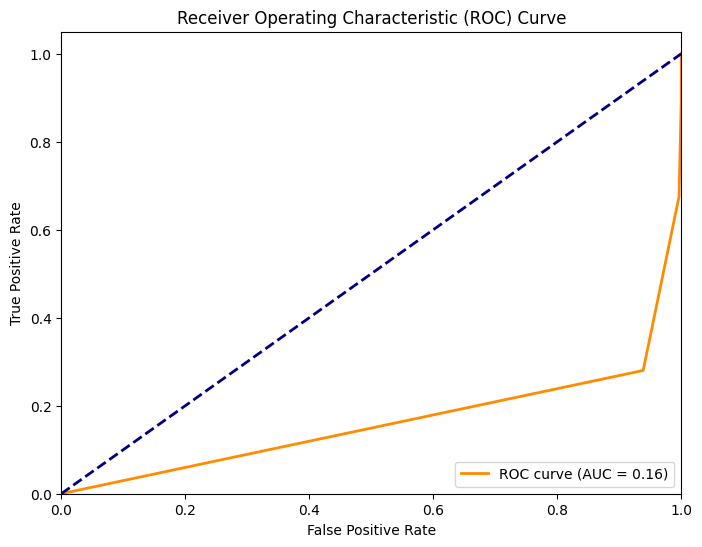

Confusion Matrix:
[[ 183  381]
 [  20 5498]]
F1-score: 0.48


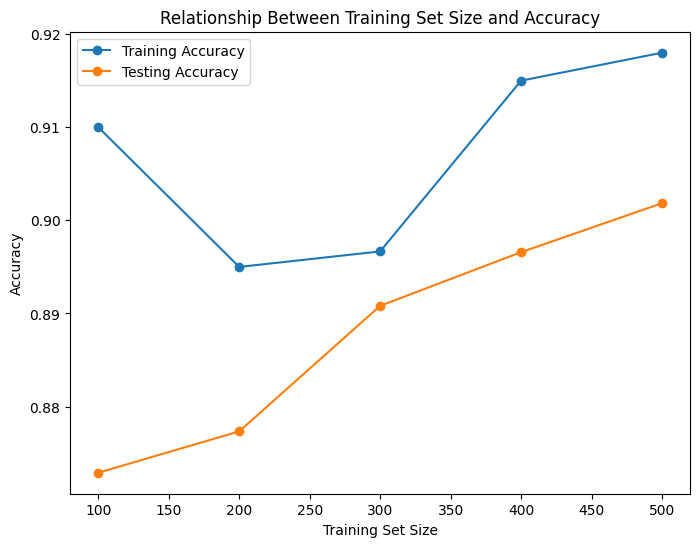

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, f1_score

# Step 1: Load and preprocess the dataset
data = pd.read_csv("data.csv")

# Select the relevant features (columns)
features = [
    'ALCDAY5', 'X_AGE_G', 'SMOKE100', 'SMOKDAY2', 'SEX',
    'X_HISPANC', 'X_MRACE1', 'MARITAL', 'GENHLTH', 'HLTHPLN1', 'EDUCA',
    'INCOME2', 'X_BMI5CAT', 'EXERANY2', 'ALCGRP', 'DRKWEEKLY', 'ASTHMA4', 'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6', 'NEVERSMK'
]

# Create X (features) and y (target) datasets
X = data[features]
y = data['ASTHMA3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train a machine learning model (K-Nearest Neighbors) with hyperparameter tuning
param_grid = {'n_neighbors': [3, 5, 7, 9]}  # Try different values of k
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']

# Train the model with the best k
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)

# Step 3: Load user input data from "input.csv"
input_data = pd.read_csv("Testing.csv")

# Step 4: Make predictions for the user input data
user_predictions = model.predict(input_data[features])

# Step 5: Store the results in a new CSV file
result_df = pd.DataFrame({'Prediction': user_predictions})
result_df.to_csv("KNN_results.csv", index=False)

# Step 6: Print whether the person is asthmatic or not based on the model's predictions
for i, prediction in enumerate(user_predictions):
    if prediction == 1:
        print(f"Person {i+1} is asthmatic.")
    else:
        print(f"Person {i+1} is not asthmatic.")

# Step 7: Calculate and print the overall accuracy of the model
accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Overall accuracy of the model: {accuracy * 100:.2f}%")

# Calculate ROC curve and AUC
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=1)  # Specify pos_label=1
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Step 9: Calculate and print the Confusion Matrix
conf_matrix = confusion_matrix(y_test, model.predict(X_test))
print("Confusion Matrix:")
print(conf_matrix)

# Step 10: Calculate and print the F1-score
f1 = f1_score(y_test, model.predict(X_test))
print(f"F1-score: {f1:.2f}")

# Step 11: Visualize the relationship between testing and training data
train_sizes = [100, 200, 300, 400, 500]  # You can adjust these sizes as needed
train_accuracy = []
test_accuracy = []

for size in train_sizes:
    X_subset_train, _, y_subset_train, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    model.fit(X_subset_train, y_subset_train)

    train_accuracy.append(accuracy_score(y_subset_train, model.predict(X_subset_train)))
    test_accuracy.append(accuracy_score(y_test, model.predict(X_test)))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_accuracy, 'o-', label='Training Accuracy')
plt.plot(train_sizes, test_accuracy, 'o-', label='Testing Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Relationship Between Training Set Size and Accuracy')
plt.legend(loc='best')
plt.show()


In [ ]:
pip install geneticalgorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15080 sha256=4344457bcb6a86c9d7b14aff047af7f03c4655e679a9779929fa77c4d8c12195
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Step 1: Load and preprocess the dataset
data = pd.read_csv("Sample.csv")

# Select the relevant features (columns)
features = [
    'ALCDAY5', 'SLEPTIM1', 'X_AGE_G', 'SMOKE100', 'SMOKDAY2', 'SEX',
    'X_HISPANC', 'X_MRACE1', 'MARITAL', 'GENHLTH', 'HLTHPLN1', 'EDUCA',
    'INCOME2', 'X_BMI5CAT', 'EXERANY2', 'ALCGRP', 'DRKWEEKLY', 'ASTHMA4','AGE2','AGE3','AGE4','AGE5','AGE6','NEVERSMK'
]

# Create X (features) and y (target) datasets
X = data[features]
y = data['ASTHMA3']

# Step 2: Initialize a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 3: Perform k-fold Cross-Validation (e.g., 5-fold)
cv_scores = cross_val_score(model, X, y, cv=5)

# Step 4: Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.98438271 0.98339362 0.98290036 0.9832292  0.98290036]
Mean Accuracy: 0.9833612501576487


**TRAINING AND TESTING ACCURACY**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load and preprocess the dataset
data = pd.read_csv("Sample.csv")

# Select features and target
X = data.drop(columns=["ASTHMA3"])
y = data["ASTHMA3"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Evaluate the model on the training data
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the model on the testing data
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Check for overfitting using learning curves
# Plot learning curves to visualize the convergence of training and testing performance


Training Accuracy: 1.00
Testing Accuracy: 0.98


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
Person 416 (Gradient Boosting) is asthmatic.
Person 417 (Gradient Boosting) is asthmatic.
Person 418 (Gradient Boosting) is asthmatic.
Person 419 (Gradient Boosting) is asthmatic.
Person 420 (Gradient Boosting) is asthmatic.
Person 421 (Gradient Boosting) is asthmatic.
Person 422 (Gradient Boosting) is not asthmatic.
Person 423 (Gradient Boosting) is asthmatic.
Person 424 (Gradient Boosting) is asthmatic.
Person 425 (Gradient Boosting) is not asthmatic.
Person 426 (Gradient Boosting) is asthmatic.
Person 427 (Gradient Boosting) is asthmatic.
Person 428 (Gradient Boosting) is asthmatic.
Person 429 (Gradient Boosting) is asthmatic.
Person 430 (Gradient Boosting) is asthmatic.
Person 431 (Gradient Boosting) is not asthmatic.
Person 432 (Gradient Boosting) is asthmatic.
Person 433 (Gradient Boosting) is asthmatic.
Person 434 (Gradient Boosting) is asthmatic.
Person 435 (Gradient Boosting) is asthmatic.
Person 436 (Gradient Boosting) is ast

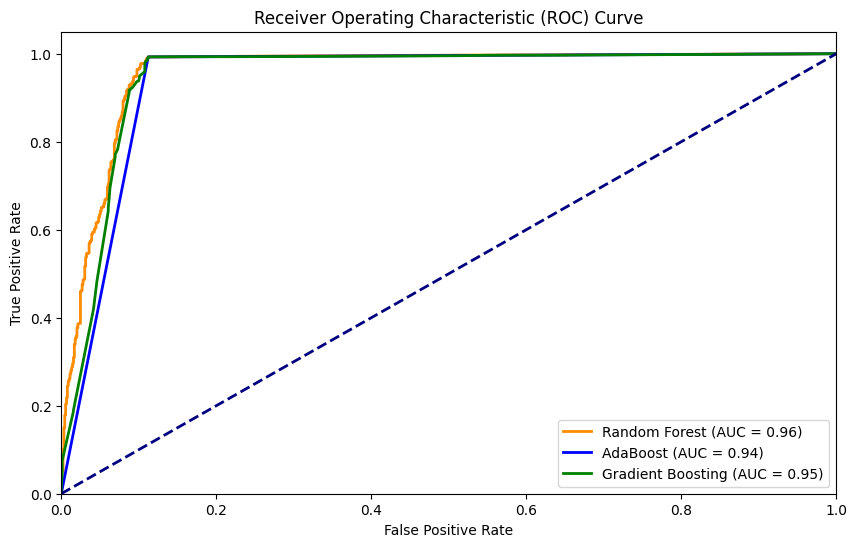

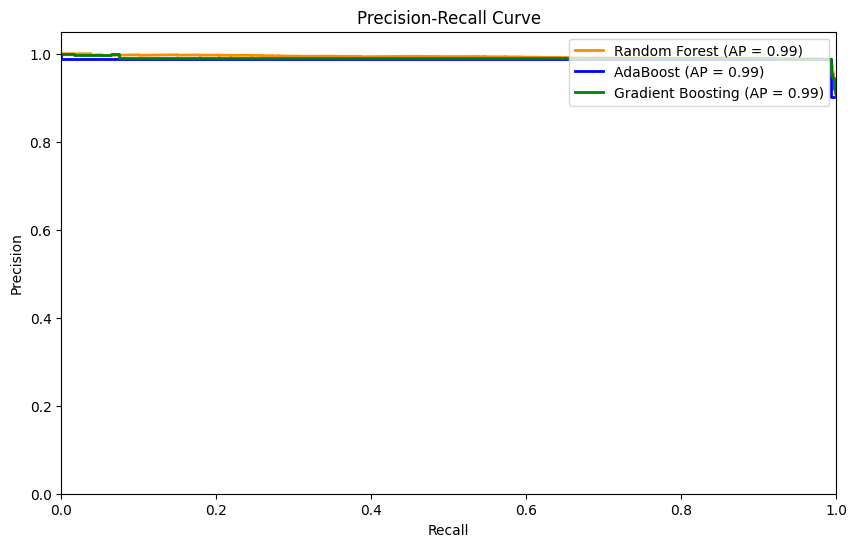

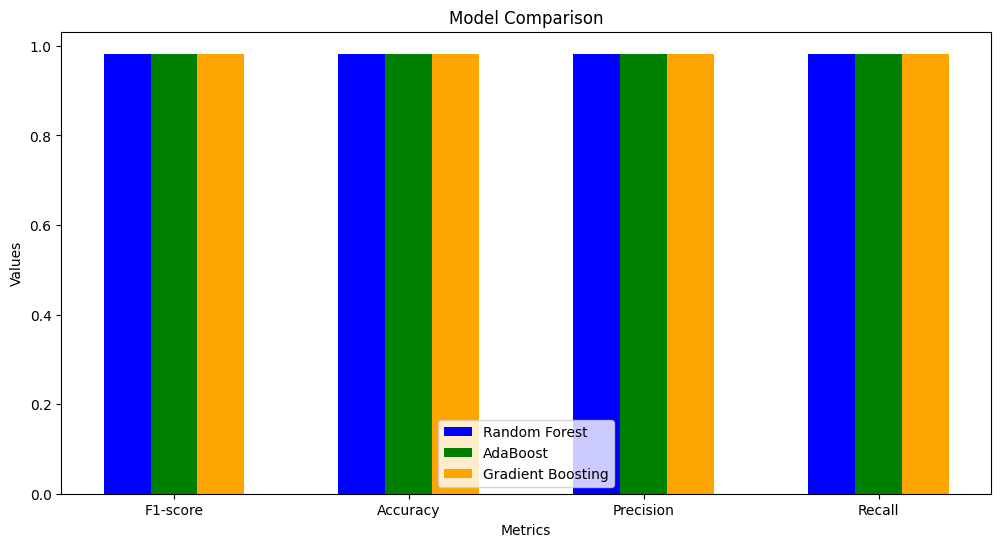

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       891
           1       0.99      0.99      0.99      8233

    accuracy                           0.98      9124
   macro avg       0.96      0.94      0.95      9124
weighted avg       0.98      0.98      0.98      9124

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       891
           1       0.99      0.99      0.99      8233

    accuracy                           0.98      9124
   macro avg       0.96      0.94      0.95      9124
weighted avg       0.98      0.98      0.98      9124

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       891
           1       0.99      0.99      0.99      8233

    accuracy                           0.98      9124
   macro avg      

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Step 1: Load and preprocess the dataset
data = pd.read_csv("Sample.csv")

# Select the relevant features (columns)
features = [
    'ALCDAY5',  'X_AGE_G', 'SMOKE100', 'SMOKDAY2', 'SEX',
    'X_HISPANC', 'X_MRACE1', 'MARITAL', 'GENHLTH', 'HLTHPLN1', 'EDUCA',
    'INCOME2', 'X_BMI5CAT', 'EXERANY2', 'ALCGRP', 'DRKWEEKLY', 'ASTHMA4','AGE2','AGE3','AGE4','AGE5','AGE6','NEVERSMK'
]

X = data[features]
y = data['ASTHMA3']

# Convert labels 1 to 0 and 2 to 1
y = [0 if label == 1 else 1 for label in y]

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize and tune models with GridSearchCV
# Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                             n_jobs=-1, verbose=1, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

best_rf_model = rf_grid_search.best_estimator_

# AdaBoost
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

ada_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), random_state=42)
ada_grid_search = GridSearchCV(ada_model, ada_param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                               n_jobs=-1, verbose=1, scoring='accuracy')
ada_grid_search.fit(X_train, y_train)

best_ada_model = ada_grid_search.best_estimator_

# Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}

gb_model = GradientBoostingClassifier(random_state=42)
gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                             n_jobs=-1, verbose=1, scoring='accuracy')
gb_grid_search.fit(X_train, y_train)

best_gb_model = gb_grid_search.best_estimator_

# Step 4: Make predictions for the user input data
input_data = pd.read_csv("Testing.csv")

user_predictions_rf = best_rf_model.predict(input_data[features])
user_predictions_ada = best_ada_model.predict(input_data[features])
user_predictions_gb = best_gb_model.predict(input_data[features])

# Step 5: Store the results in new CSV files
result_df_rf = pd.DataFrame({'Prediction': user_predictions_rf})
result_df_rf.to_csv("RF_results.csv", index=False)

result_df_ada = pd.DataFrame({'Prediction': user_predictions_ada})
result_df_ada.to_csv("AdaBoost_results.csv", index=False)

result_df_gb = pd.DataFrame({'Prediction': user_predictions_gb})
result_df_gb.to_csv("GradientBoosting_results.csv", index=False)

# Step 6: Print whether the person is asthmatic or not based on the model's predictions
for i, prediction in enumerate(user_predictions_rf):
    if prediction == 1:
        print(f"Person {i+1} (Random Forest) is asthmatic.")
    else:
        print(f"Person {i+1} (Random Forest) is not asthmatic.")

for i, prediction in enumerate(user_predictions_ada):
    if prediction == 1:
        print(f"Person {i+1} (AdaBoost) is asthmatic.")
    else:
        print(f"Person {i+1} (AdaBoost) is not asthmatic.")

for i, prediction in enumerate(user_predictions_gb):
    if prediction == 1:
        print(f"Person {i+1} (Gradient Boosting) is asthmatic.")
    else:
        print(f"Person {i+1} (Gradient Boosting) is not asthmatic.")

# Step 7: Calculate and print the overall accuracy of the models on the test set
accuracy_rf = accuracy_score(y_test, best_rf_model.predict(X_test))
accuracy_ada = accuracy_score(y_test, best_ada_model.predict(X_test))
accuracy_gb = accuracy_score(y_test, best_gb_model.predict(X_test))

print(f"Random Forest - Overall accuracy on the test set: {accuracy_rf * 100:.2f}%")
print(f"AdaBoost - Overall accuracy on the test set: {accuracy_ada * 100:.2f}%")
print(f"Gradient Boosting - Overall accuracy on the test set: {accuracy_gb * 100:.2f}%")

# Calculate ROC curves and AUC for all models
y_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]
y_proba_ada = best_ada_model.predict_proba(X_test)[:, 1]
y_proba_gb = best_gb_model.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_ada, tpr_ada, _ = roc_curve(y_test, y_proba_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_ada, tpr_ada, color='blue', lw=2, label=f'AdaBoost (AUC = {roc_auc_ada:.2f})')
plt.plot(fpr_gb, tpr_gb, color='green', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate Precision-Recall curves and Average Precision for all models
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)
average_precision_rf = average_precision_score(y_test, y_proba_rf)

precision_ada, recall_ada, _ = precision_recall_curve(y_test, y_proba_ada)
average_precision_ada = average_precision_score(y_test, y_proba_ada)

precision_gb, recall_gb, _ = precision_recall_curve(y_test, y_proba_gb)
average_precision_gb = average_precision_score(y_test, y_proba_gb)

# Plot Precision-Recall curves
plt.figure(figsize=(10, 6))
plt.step(recall_rf, precision_rf, color='darkorange', where='post', lw=2, label=f'Random Forest (AP = {average_precision_rf:.2f})')
plt.step(recall_ada, precision_ada, color='blue', where='post', lw=2, label=f'AdaBoost (AP = {average_precision_ada:.2f})')
plt.step(recall_gb, precision_gb, color='green', where='post', lw=2, label=f'Gradient Boosting (AP = {average_precision_gb:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc='upper right')
plt.show()

# Step 8: Evaluate the models on the test set
y_pred_rf = best_rf_model.predict(X_test)
y_pred_ada = best_ada_model.predict(X_test)
y_pred_gb = best_gb_model.predict(X_test)

# Step 9: Calculate F1-score, accuracy, precision, and recall
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

f1_ada = f1_score(y_test, y_pred_ada, average='weighted')
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada, average='weighted')
recall_ada = recall_score(y_test, y_pred_ada, average='weighted')

f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')

# Step 10: Compare the models using bar charts
metrics = ['F1-score', 'Accuracy', 'Precision', 'Recall']
rf_values = [f1_rf, accuracy_rf, precision_rf, recall_rf]
ada_values = [f1_ada, accuracy_ada, precision_ada, recall_ada]
gb_values = [f1_gb, accuracy_gb, precision_gb, recall_gb]

x = range(len(metrics))

plt.figure(figsize=(12, 6))
plt.bar(x, rf_values, width=0.2, label='Random Forest', align='center', color='blue')
plt.bar([i + 0.2 for i in x], ada_values, width=0.2, label='AdaBoost', align='center', color='green')
plt.bar([i + 0.4 for i in x], gb_values, width=0.2, label='Gradient Boosting', align='center', color='orange')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Comparison')
plt.xticks([i + 0.2 for i in x], metrics)
plt.legend()
plt.show()

# Step 11: Display classification report
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_rf_bin = lb.transform(y_pred_rf)
y_pred_ada_bin = lb.transform(y_pred_ada)
y_pred_gb_bin = lb.transform(y_pred_gb)

print("Random Forest Classification Report:")
print(classification_report(y_test_bin, y_pred_rf_bin, target_names=[str(c) for c in lb.classes_]))

print("AdaBoost Classification Report:")
print(classification_report(y_test_bin, y_pred_ada_bin, target_names=[str(c) for c in lb.classes_]))

print("Gradient Boosting Classification Report:")
print(classification_report(y_test_bin, y_pred_gb_bin, target_names=[str(c) for c in lb.classes_]))


In [ ]:
pip install tensorflow


Epoch 1/10
267/267 [==============================] - 6s 8ms/step - loss: 0.1027 - accuracy: 0.9755 - val_loss: 0.0767 - val_accuracy: 0.9845
Epoch 2/10
267/267 [==============================] - 1s 5ms/step - loss: 0.0717 - accuracy: 0.9853 - val_loss: 0.0765 - val_accuracy: 0.9845
Epoch 3/10
267/267 [==============================] - 1s 5ms/step - loss: 0.0705 - accuracy: 0.9851 - val_loss: 0.0778 - val_accuracy: 0.9845
Epoch 4/10
267/267 [==============================] - 1s 4ms/step - loss: 0.0688 - accuracy: 0.9852 - val_loss: 0.0777 - val_accuracy: 0.9845
Epoch 5/10
267/267 [==============================] - 1s 3ms/step - loss: 0.0669 - accuracy: 0.9854 - val_loss: 0.0792 - val_accuracy: 0.9845
Epoch 6/10
267/267 [==============================] - 1s 4ms/step - loss: 0.0657 - accuracy: 0.9854 - val_loss: 0.0805 - val_accuracy: 0.9845
Epoch 7/10
267/267 [==============================] - 1s 3ms/step - loss: 0.0650 - accuracy: 0.9853 - val_loss: 0.0776 - val_accuracy: 0.9845
Epoch 

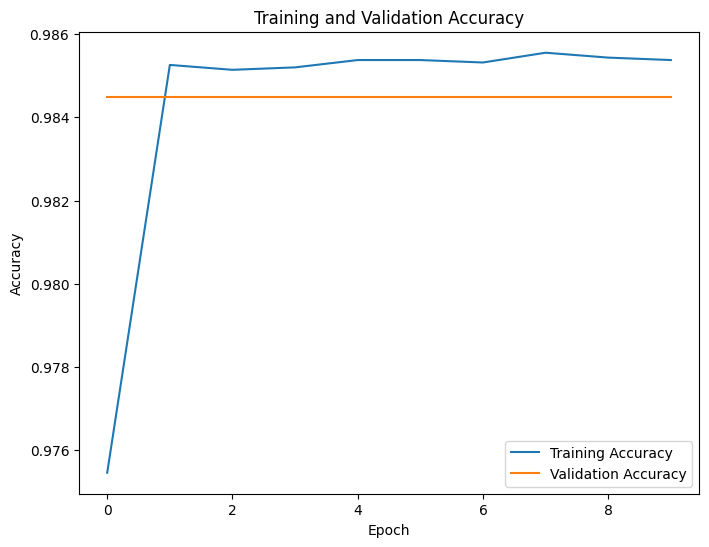

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import tensorflow as tf
from tensorflow import keras

# Step 1: Load and preprocess the dataset
data = pd.read_csv("Sample.csv")

# Select the relevant features (columns)
features = [
    'ALCDAY5', 'SLEPTIM1', 'X_AGE_G', 'SMOKE100', 'SMOKDAY2', 'SEX',
    'X_HISPANC', 'X_MRACE1', 'MARITAL', 'GENHLTH', 'HLTHPLN1', 'EDUCA',
    'INCOME2', 'X_BMI5CAT', 'EXERANY2', 'ALCGRP', 'DRKWEEKLY', 'ASTHMA4', 'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6', 'NEVERSMK'
]

# Create X (features) and y (target) datasets
X = data[features]
y = data['ASTHMA3']

# Convert y to one-hot encoded labels for multiclass classification
y = pd.get_dummies(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Build a neural network model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(y.shape[1], activation='softmax')  # Softmax activation for multiclass classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the neural network model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Step 4: Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)  # Get the predicted class

# Calculate accuracy, confusion matrix, and F1-score
accuracy = accuracy_score(np.argmax(y_test.values, axis=1), y_pred_class)
conf_matrix = confusion_matrix(np.argmax(y_test.values, axis=1), y_pred_class)
f1 = f1_score(np.argmax(y_test.values, axis=1), y_pred_class, average='weighted')

print(f"Overall accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Weighted F1-score: {f1:.2f}")

# Step 5: Visualize training history
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


Streaming output truncated to the last 5000 lines.

Input Values: {'ALCDAY5': 888, 'SLEPTIM1': 4, 'X_AGE_G': 6, 'SMOKE100': 1, 'SMOKDAY2': 3, 'SEX': 1, 'X_HISPANC': 2, 'X_MRACE1': 1, 'MARITAL': 1, 'GENHLTH': 5, 'HLTHPLN1': 1, 'EDUCA': 4, 'INCOME2': 4, 'X_BMI5CAT': 4, 'EXERANY2': 2, 'ALCGRP': 1, 'DRKWEEKLY': 0, 'ASTHMA4': 0, 'AGE2': 0, 'AGE3': 0, 'AGE4': 0, 'AGE5': 0, 'AGE6': 1, 'NEVERSMK': 0}
Predicted Asthma Status: 2

Input Values: {'ALCDAY5': 202, 'SLEPTIM1': 6, 'X_AGE_G': 4, 'SMOKE100': 1, 'SMOKDAY2': 3, 'SEX': 1, 'X_HISPANC': 2, 'X_MRACE1': 1, 'MARITAL': 1, 'GENHLTH': 2, 'HLTHPLN1': 1, 'EDUCA': 6, 'INCOME2': 8, 'X_BMI5CAT': 4, 'EXERANY2': 1, 'ALCGRP': 2, 'DRKWEEKLY': 0, 'ASTHMA4': 0, 'AGE2': 0, 'AGE3': 0, 'AGE4': 1, 'AGE5': 0, 'AGE6': 0, 'NEVERSMK': 0}
Predicted Asthma Status: 2

Input Values: {'ALCDAY5': 888, 'SLEPTIM1': 8, 'X_AGE_G': 6, 'SMOKE100': 1, 'SMOKDAY2': 1, 'SEX': 1, 'X_HISPANC': 2, 'X_MRACE1': 1, 'MARITAL': 2, 'GENHLTH': 3, 'HLTHPLN1': 1, 'EDUCA': 5, 'INCOME2': 1, 'X_B

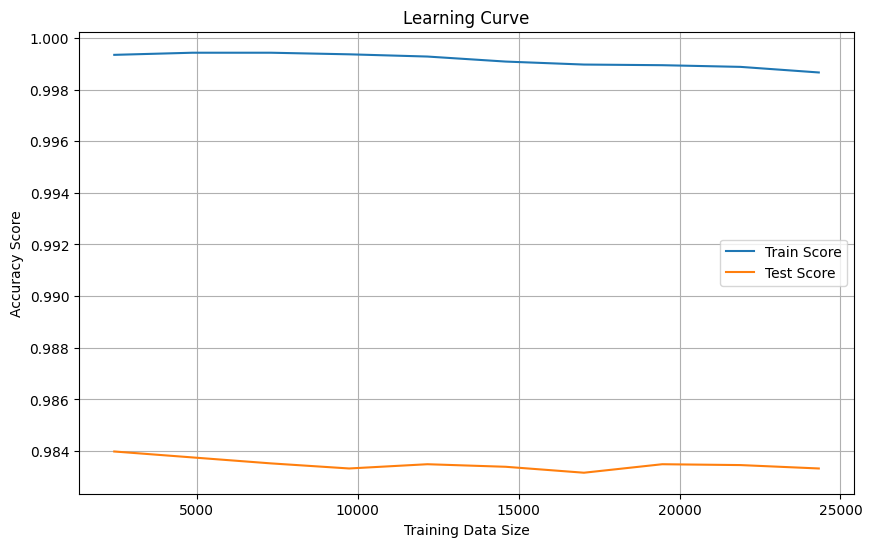

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the training data
train_file = 'Synthetic data.csv'
df_train = pd.read_csv(train_file)

# Split the data into features (X) and target (y)
X = df_train.drop(columns=['ASTHMA3'])
y = df_train['ASTHMA3']

# Encode categorical variables
label_encoders = {}
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier (you can choose a different model)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Load the input data for prediction
input_file = 'Testing.csv'
df_input = pd.read_csv(input_file)

# Remove the 'Unnamed: 24' column from the input data
if 'Unnamed: 24' in df_input.columns:
    df_input.drop(columns=['Unnamed: 24'], inplace=True)

# Encode categorical variables in the input data using the same label encoders
for col, le in label_encoders.items():
    if col in df_input.columns:
        df_input[col] = le.transform(df_input[col])
    else:
        print(f"Warning: Column '{col}' not found in the input data.")

# Make predictions on the input data
predictions = clf.predict(df_input)

# Print the predictions for each input and calculate accuracy
for i, prediction in enumerate(predictions):
    input_values = df_input.iloc[i]
    print(f"Input Values: {input_values.to_dict()}")
    print(f"Predicted Asthma Status: {prediction}")
    print()

accuracy = accuracy_score(y_test, clf.predict(X_test))
print(f"Accuracy of the Model on Test Data: {accuracy:.2f}")

# Generate Learning Curve
train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Create a DataFrame to store learning curve results
learning_curve_df = pd.DataFrame({'Train Sizes': train_sizes,
                                  'Train Scores Mean': np.mean(train_scores, axis=1),
                                  'Test Scores Mean': np.mean(test_scores, axis=1)})

# Save the learning curve results to a CSV file
learning_curve_df.to_csv('learning_curve_results.csv', index=False)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(learning_curve_df['Train Sizes'], learning_curve_df['Train Scores Mean'], label='Train Score')
plt.plot(learning_curve_df['Train Sizes'], learning_curve_df['Test Scores Mean'], label='Test Score')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('Filter1 data.csv')

# Specify the features you want to test
features_to_test = ['ALCDAY5', 'SLEPTIM1', 'X_AGE_G','SMOKDAY2', 'SEX',
                    'X_HISPANC', 'X_MRACE1', 'MARITAL', 'GENHLTH', 'HLTHPLN1', 'EDUCA',
                    'INCOME2', 'X_BMI5CAT', 'EXERANY2', 'ALCGRP', 'DRKWEEKLY', 'AGE2',
                    'AGE3', 'AGE4', 'AGE5', 'AGE6']

# Create an empty DataFrame to store the chi-square test results
results = pd.DataFrame(columns=['Feature', 'Chi-Square Statistic', 'p-value', 'Weight Percentage'])

# Initialize variables to count people with and without asthma
total_asthma = len(data[data['ASTHMA3'] == 1])  # Counting people with asthma (assuming 1 represents 'Yes' for asthma)
total_no_asthma = len(data[data['ASTHMA3'] == 0])  # Counting people without asthma (assuming 0 represents 'No' for asthma)

# Calculate the total chi-square statistic
total_chi2 = 0

# Iterate through the selected features and perform chi-square tests
for feature in features_to_test:
    observed_data = pd.crosstab(data[feature], data['ASTHMA3'])  # Assuming 'ASTHMA' is your asthma variable
    chi2, p, _, _ = chi2_contingency(observed_data)
    weight_percentage = (chi2 / total_chi2) * 100 if total_chi2 > 0 else 0
    results = results.append({'Feature': feature, 'Chi-Square Statistic': chi2, 'p-value': p, 'Weight Percentage': weight_percentage}, ignore_index=True)
    total_chi2 += chi2

# Sort the results by p-value in ascending order (lower p-value indicates higher significance)
results = results.sort_values(by='p-value')

# Display the results
print("Chi-Square Test Results:")
print(results)
print("\nPercentage of Variance Explained by Each Feature:")
print(results[['Feature', 'Weight Percentage']])
print("\nNumber of People with Asthma:", total_asthma)
print("Number of People without Asthma:", total_no_asthma)


<ipython-input-25-f21302bddf92>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Feature': feature, 'Chi-Square Statistic': chi2, 'p-value': p, 'Weight Percentage': weight_percentage}, ignore_index=True)
<ipython-input-25-f21302bddf92>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Feature': feature, 'Chi-Square Statistic': chi2, 'p-value': p, 'Weight Percentage': weight_percentage}, ignore_index=True)
<ipython-input-25-f21302bddf92>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Feature': feature, 'Chi-Square Statistic': chi2, 'p-value': p, 'Weight Percentage': weight_percentage}, ignore_index=True)
<ipython-input-25-f21302bddf92>:29: F

Chi-Square Test Results:
      Feature  Chi-Square Statistic        p-value Weight Percentage
8     GENHLTH            537.978966  4.080362e-115         86.077687
11    INCOME2            223.076883   1.466260e-44         18.232053
1    SLEPTIM1            231.042556   2.082746e-38         258.10544
4         SEX            139.685931   3.118129e-32         38.704863
6    X_MRACE1             78.720531   6.564452e-15         15.663765
13   EXERANY2             60.605532   6.973775e-15           4.01256
14     ALCGRP             60.676924   6.670729e-14           3.86231
12  X_BMI5CAT             63.776300   9.163861e-14          4.408645
10      EDUCA             57.090996   4.843208e-11          4.894417
7     MARITAL             43.707260   2.655787e-08          7.519075
20       AGE6             24.309756   8.202256e-07          1.463752
0     ALCDAY5             89.514795   3.039624e-06                 0
2     X_AGE_G             27.880688   3.840649e-05          8.697566
19       

<ipython-input-25-f21302bddf92>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Feature': feature, 'Chi-Square Statistic': chi2, 'p-value': p, 'Weight Percentage': weight_percentage}, ignore_index=True)
<ipython-input-25-f21302bddf92>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Feature': feature, 'Chi-Square Statistic': chi2, 'p-value': p, 'Weight Percentage': weight_percentage}, ignore_index=True)
<ipython-input-25-f21302bddf92>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Feature': feature, 'Chi-Square Statistic': chi2, 'p-value': p, 'Weight Percentage': weight_percentage}, ignore_index=True)


In [ ]:
import pandas as pd
from sklearn.feature_selection import chi2

# Load the dataset
data = pd.read_csv("Sample.csv")

# Select the features and target variable
features = [
    'ALCDAY5', 'SLEPTIM1', 'X_AGE_G', 'SMOKE100', 'SMOKDAY2', 'SEX',
    'X_HISPANC', 'X_MRACE1', 'MARITAL', 'GENHLTH', 'HLTHPLN1', 'EDUCA',
    'INCOME2', 'X_BMI5CAT', 'EXERANY2', 'ALCGRP', 'DRKWEEKLY', 'ASTHMA4',
    'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6', 'NEVERSMK'
]

target = 'ASTHMA3'

# Calculate the chi-square statistic for each feature
chi2_values, p_values = chi2(data[features], data[target])

# Select the features with a statistically significant chi-square statistic
selected_features = [feature for i, feature in enumerate(features) if p_values[i] <= 0.05]

# Print the selected features and their corresponding chi-square statistics
for i, feature in enumerate(features):
    print(f"{feature}: Chi-Square Statistic = {chi2_values[i]:.4f}, p-value = {p_values[i]:.4f}")

# Print the selected features
print("Selected Features:")
print(selected_features)


ALCDAY5: Chi-Square Statistic = 254.4767, p-value = 0.0000
SLEPTIM1: Chi-Square Statistic = 0.0014, p-value = 0.9698
X_AGE_G: Chi-Square Statistic = 20.6114, p-value = 0.0000
SMOKE100: Chi-Square Statistic = 0.0000, p-value = 1.0000
SMOKDAY2: Chi-Square Statistic = 14.8796, p-value = 0.0001
SEX: Chi-Square Statistic = 1.5859, p-value = 0.2079
X_HISPANC: Chi-Square Statistic = 8.6330, p-value = 0.0033
X_MRACE1: Chi-Square Statistic = 52.0721, p-value = 0.0000
MARITAL: Chi-Square Statistic = 44.7150, p-value = 0.0000
GENHLTH: Chi-Square Statistic = 105.6979, p-value = 0.0000
HLTHPLN1: Chi-Square Statistic = 0.0020, p-value = 0.9639
EDUCA: Chi-Square Statistic = 5.1248, p-value = 0.0236
INCOME2: Chi-Square Statistic = 157.0393, p-value = 0.0000
X_BMI5CAT: Chi-Square Statistic = 6.2261, p-value = 0.0126
EXERANY2: Chi-Square Statistic = 0.3169, p-value = 0.5735
ALCGRP: Chi-Square Statistic = 6.7941, p-value = 0.0091
DRKWEEKLY: Chi-Square Statistic = 117.6600, p-value = 0.0000
ASTHMA4: Chi-S

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Streaming output truncated to the last 5000 lines.
Person 414 is asthmatic.
Person 415 is asthmatic.
Person 416 is asthmatic.
Person 417 is asthmatic.
Person 418 is asthmatic.
Person 419 is asthmatic.
Person 420 is asthmatic.
Person 421 is asthmatic.
Person 422 is not asthmatic.
Person 423 is asthmatic.
Person 424 is asthmatic.
Person 425 is not asthmatic.
Person 426 is asthmatic.
Person 427 is asthmatic.
Person 428 is asthmatic.
Person 429 is asthmatic.
Person 430 is asthmatic.
Person 431 is not asthmatic.
Person 432 is asthmatic.
Person 433 is asthmatic.
Person 434 is asthmatic.
Person 435 is asthmatic.
Person 436 is asthmatic.
Person 437 is asthmatic.
Person 438 is not asthmatic.
Person 439 is asthmatic.
Person 440 is asthmatic.
Person 441 is not asthmatic.
Person 442 is asthmatic.
Person 443 is asthmatic.
Person 444 is asthmatic.
Person 445 is asthmatic.
Person 446 is asthmatic.
Person 447 is asthmatic.
Person 448 is asthmatic.
Person 449 is asthmatic.
Person 450 is asthmatic.
Pers

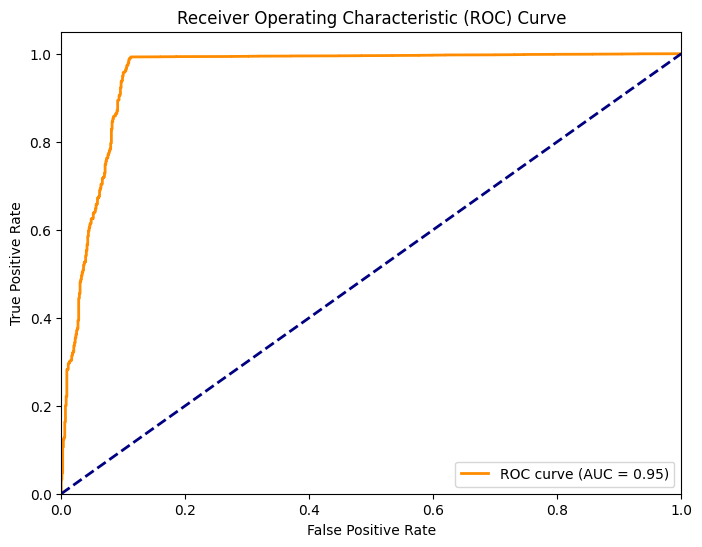

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset
data = pd.read_csv("Sample.csv")

# Select the relevant features (columns)
features = [
    'ALCDAY5', 'SLEPTIM1', 'X_AGE_G', 'SMOKE100', 'SMOKDAY2', 'SEX',
    'X_HISPANC', 'X_MRACE1', 'MARITAL', 'GENHLTH', 'HLTHPLN1', 'EDUCA',
    'INCOME2', 'X_BMI5CAT', 'EXERANY2', 'ALCGRP', 'DRKWEEKLY', 'ASTHMA4',
    'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6', 'NEVERSMK'
]

# Create X (features) and y (target) datasets
X = data[features]
y = data['ASTHMA3']

# Convert labels 1 to 0 and 2 to 1
y = [0 if label == 1 else 1 for label in y]

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize models for Random Forest, Logistic Regression, SVM, XGBoost, and MLP
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [10],
    'min_samples_split': [5],
    'min_samples_leaf': [2]
}
rf_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

lr_model = LogisticRegression(random_state=42)
svm_model = SVC(probability=True, random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42)
mlp_model = MLPClassifier(random_state=42)

# Step 4: Train all models
lr_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)

# Step 5: Make predictions for the user input data
input_data = pd.read_csv("Testing.csv")

rf_predictions = best_rf_model.predict(input_data[features])
lr_predictions = lr_model.predict(input_data[features])
svm_predictions = svm_model.predict(input_data[features])
xgb_predictions = xgb_model.predict(input_data[features])
mlp_predictions = mlp_model.predict(input_data[features])

# Step 6: Ensemble predictions using a Voting Classifier
ensemble = VotingClassifier(estimators=[
    ('rf', best_rf_model),
    ('lr', lr_model),
    ('svm', svm_model),
    ('xgb', xgb_model),
    ('mlp', mlp_model)
], voting='soft')

ensemble.fit(X_train, y_train)
ensemble_predictions = ensemble.predict(input_data[features])

# Step 7: Store the results in a new CSV file
result_df = pd.DataFrame({
    'RF_Prediction': rf_predictions,
    'LR_Prediction': lr_predictions,
    'SVM_Prediction': svm_predictions,
    'XGB_Prediction': xgb_predictions,
    'MLP_Prediction': mlp_predictions,
    'Ensemble_Prediction': ensemble_predictions
})
result_df.to_csv("Disease_Predictions.csv", index=False)

# Step 8: Print whether the person is asthmatic or not based on the model's predictions
for i, prediction in enumerate(ensemble_predictions):
    if prediction == 1:
        print(f"Person {i+1} is asthmatic.")
    else:
        print(f"Person {i+1} is not asthmatic.")

# Step 9: Calculate and print the overall accuracy of the ensemble model on the test set
accuracy = accuracy_score(y_test, ensemble.predict(X_test))
print(f"Overall accuracy of the ensemble model on the test set: {accuracy * 100:.2f}%")

# Calculate ROC curve and AUC
y_proba = ensemble.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Step 10: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
pip install deap

Streaming output truncated to the last 5000 lines.
Person 414 is asthmatic according to Random Forest.
Person 415 is asthmatic according to Random Forest.
Person 416 is asthmatic according to Random Forest.
Person 417 is asthmatic according to Random Forest.
Person 418 is asthmatic according to Random Forest.
Person 419 is asthmatic according to Random Forest.
Person 420 is asthmatic according to Random Forest.
Person 421 is asthmatic according to Random Forest.
Person 422 is not asthmatic according to Random Forest.
Person 423 is asthmatic according to Random Forest.
Person 424 is asthmatic according to Random Forest.
Person 425 is not asthmatic according to Random Forest.
Person 426 is asthmatic according to Random Forest.
Person 427 is asthmatic according to Random Forest.
Person 428 is asthmatic according to Random Forest.
Person 429 is asthmatic according to Random Forest.
Person 430 is asthmatic according to Random Forest.
Person 431 is not asthmatic according to Random Forest.
P

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 98.25%
KNN Accuracy: 91.21%
SVM Accuracy: 90.23%


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


KeyboardInterrupt: 

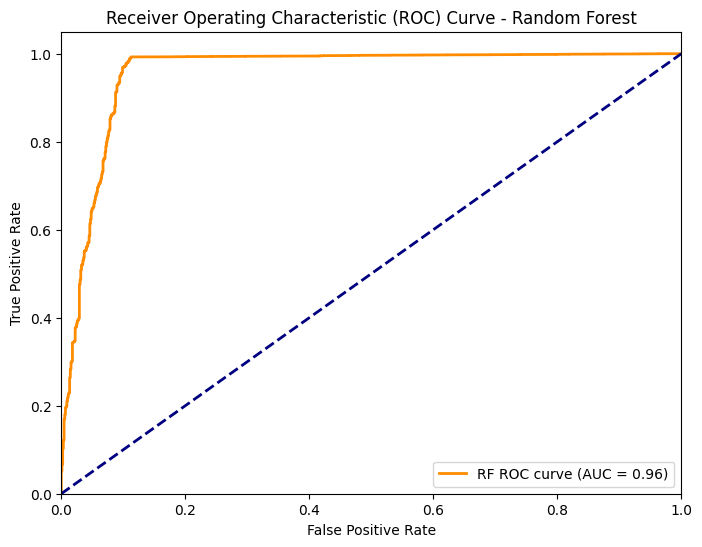

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc

# Step 1: Load and preprocess the dataset
data = pd.read_csv("Sample.csv")

# Select the relevant features (columns)
features = [
    'ALCDAY5', 'SLEPTIM1', 'X_AGE_G', 'SMOKE100', 'SMOKDAY2', 'SEX',
    'X_HISPANC', 'X_MRACE1', 'MARITAL', 'GENHLTH', 'HLTHPLN1', 'EDUCA',
    'INCOME2', 'X_BMI5CAT', 'EXERANY2', 'ALCGRP', 'DRKWEEKLY', 'ASTHMA4',
    'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6', 'NEVERSMK'
]

# Create X (features) and y (target) datasets
X = data[features]
y = data['ASTHMA3']

# Convert labels 1 to 0 and 2 to 1
y = [0 if label == 1 else 1 for label in y]

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize a Random Forest Classifier with hyperparameter tuning
param_grid = {
    'n_estimators': [100],  # You can experiment with other values
    'max_depth': [10],      # Adjust max_depth as needed
    'min_samples_split': [5],
    'min_samples_leaf': [2]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_rf_model = grid_search.best_estimator_

# Step 4: Make predictions for the user input data
input_data = pd.read_csv("Testing.csv")
user_predictions_rf = best_rf_model.predict(input_data[features])

# Step 5: Store the results in a new CSV file for Random Forest
result_df_rf = pd.DataFrame({'Prediction_RF': user_predictions_rf})
result_df_rf.to_csv("RF_results.csv", index=False)

# Step 6: Print whether the person is asthmatic or not based on the Random Forest model's predictions
for i, prediction in enumerate(user_predictions_rf):
    if prediction == 1:
        print(f"Person {i+1} is asthmatic according to Random Forest.")
    else:
        print(f"Person {i+1} is not asthmatic according to Random Forest.")

# Step 7: Calculate and print the overall accuracy of the Random Forest model on the test set
accuracy_rf = accuracy_score(y_test, best_rf_model.predict(X_test))
print(f"Random Forest Overall accuracy on the test set: {accuracy_rf * 100:.2f}%")

# Calculate ROC curve and AUC for Random Forest
y_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'RF ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')

# Implement Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
lr_predictions = logistic_regression.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%")

# Implement K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")

# Implement Support Vector Machine (SVM)
svm = SVC(probability=True)
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")

# Implement Genetic Algorithm for Feature Selection
# Define a fitness function (you can use AUC as the fitness score)
def evaluate(individual, X, y):
    selected_features = [features[i] for i in range(len(individual)) if individual[i]]
    X_selected = X[selected_features]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

    # Train and evaluate a model (e.g., Random Forest) on the selected features
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    return roc_auc,

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", np.random.choice, [False, True])
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(features))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate, X=X, y=y)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Genetic Algorithm
population = toolbox.population(n=50)
gen, best_auc = algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=10, verbose=False)

best_individual = tools.selBest(population, k=1)[0]
selected_features_genetic = [features[i] for i in range(len(best_individual)) if best_individual[i]]
print("Best Features Selected by Genetic Algorithm:")
print(selected_features_genetic)

# Train and evaluate the final model with the selected features using Random Forest
X_selected_genetic = X[selected_features_genetic]
X_train_genetic, X_test_genetic, y_train_genetic, y_test_genetic = train_test_split(
    X_selected_genetic, y, test_size=0.3, random_state=42
)
final_rf_model_genetic = RandomForestClassifier(random_state=42)
final_rf_model_genetic.fit(X_train_genetic, y_train_genetic)
final_rf_predictions_genetic = final_rf_model_genetic.predict(X_test_genetic)
final_rf_accuracy_genetic = accuracy_score(y_test_genetic, final_rf_predictions_genetic)
print(f"Random Forest with Selected Features (Genetic Algorithm) Accuracy: {final_rf_accuracy_genetic * 100:.2f}%")


# Display ROC curves for Random Forest and Genetic Algorithm
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'RF ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Evaluate and compare the models
models = [
    ("Random Forest", best_rf_model),
    ("Logistic Regression", logistic_regression),
    ("K-Nearest Neighbors (KNN)", knn),
    ("Support Vector Machine (SVM)", svm),
    ("Random Forest (Genetic Algorithm)", final_rf_model_genetic)
]

for model_name, model in models:
    # Predictions
    if "Genetic Algorithm" in model_name:
        X_test_model = X_test_genetic
    else:
        X_test_model = X_test

    y_pred = model.predict(X_test_model)
    y_proba = model.predict_proba(X_test_model)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Print metrics
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2
from deap import base, creator, tools, algorithms

# Load and preprocess the dataset
data = pd.read_csv("Sample.csv")

# Select the relevant features (columns)
features = [
    'ALCDAY5', 'SLEPTIM1', 'X_AGE_G', 'SMOKE100', 'SMOKDAY2', 'SEX',
    'X_HISPANC', 'X_MRACE1', 'MARITAL', 'GENHLTH', 'HLTHPLN1', 'EDUCA',
    'INCOME2', 'X_BMI5CAT', 'EXERANY2', 'ALCGRP', 'DRKWEEKLY', 'ASTHMA4',
    'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6', 'NEVERSMK'
]

# Create X (features) and y (target) datasets
X = data[features]
y = data['ASTHMA3']

# Convert labels 1 to 0 and 2 to 1
y = [0 if label == 1 else 1 for label in y]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a Random Forest Classifier with hyperparameter tuning
param_grid = {
    'n_estimators': [100],  # You can experiment with other values
    'max_depth': [10],      # Adjust max_depth as needed
    'min_samples_split': [5],
    'min_samples_leaf': [2]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_rf_model = grid_search.best_estimator_

# Create a function to preprocess input data consistently
def preprocess_input_data(input_data):
    # Use the same features used during model training
    input_features = input_data[features]
    return input_features

# Step 4: Make predictions for the user input data for all models
input_data = pd.read_csv("Testing.csv")

# Preprocess input data
input_features = preprocess_input_data(input_data)

# Initialize a list to store results
results = []

# Function to evaluate and store results for a model
def evaluate_and_store_results(model_name, model):
    # Predictions
    if "Genetic Algorithm" in model_name:
        X_test_model = X_test_genetic
    else:
        X_test_model = input_features  # Use preprocessed input data for predictions

    y_pred = model.predict(X_test_model)

    # Store results
    results.append({
        "Model": model_name,
        "Prediction": y_pred
    })

# Evaluate and store results for Random Forest
evaluate_and_store_results("Random Forest", best_rf_model)

# Implement Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
evaluate_and_store_results("Logistic Regression", logistic_regression)

# Implement K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
evaluate_and_store_results("K-Nearest Neighbors (KNN)", knn)

# Implement Support Vector Machine (SVM)
svm = SVC(probability=True)
svm.fit(X_train, y_train)
evaluate_and_store_results("Support Vector Machine (SVM)", svm)

# Implement Genetic Algorithm for Feature Selection
# Define a fitness function (you can use AUC as the fitness score)
def evaluate(individual, X, y):
    selected_features = [features[i] for i in range(len(individual)) if individual[i]]
    X_selected = X[selected_features]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

    # Train and evaluate a model (e.g., Random Forest) on the selected features
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred)

    return roc_auc,

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", np.random.choice, [False, True])
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(features))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate, X=X, y=y)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Genetic Algorithm
population = toolbox.population(n=50)
gen, best_auc = algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=10, verbose=False)

best_individual = tools.selBest(population, k=1)[0]
selected_features_genetic = [features[i] for i in range(len(best_individual)) if best_individual[i]]

# Train and evaluate the final model with the selected features using Random Forest
X_selected_genetic = X[selected_features_genetic]
X_train_genetic, X_test_genetic, y_train_genetic, y_test_genetic = train_test_split(
    X_selected_genetic, y, test_size=0.3, random_state=42
)
final_rf_model_genetic = RandomForestClassifier(random_state=42)
final_rf_model_genetic.fit(X_train_genetic, y_train_genetic)
evaluate_and_store_results("Random Forest (Genetic Algorithm)", final_rf_model_genetic)

# Create a DataFrame to store results
results_df = pd.DataFrame(results)

# Save results to a CSV file
results_df.to_csv("model_results.csv", index=False)

# Print overall accuracy for Random Forest
overall_accuracy_rf = accuracy_score(y_test, best_rf_model.predict(X_test))
print(f"Overall accuracy of the Random Forest model on the test set: {overall_accuracy_rf * 100:.2f}%")


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Overall accuracy of the Random Forest model on the test set: 98.22%


Accuracy: 92.70%


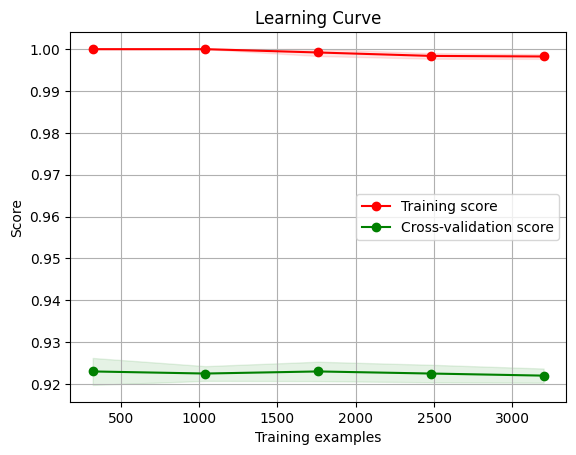

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

# Load the data from a single CSV file
data = pd.read_csv('Sample.csv')

# Select the features and target variable
features = [
    'ALCDAY5', 'SLEPTIM1', 'X_AGE_G', 'SMOKE100', 'SMOKDAY2', 'SEX',
    'X_HISPANC', 'X_MRACE1', 'MARITAL', 'GENHLTH', 'HLTHPLN1', 'EDUCA',
    'INCOME2', 'X_BMI5CAT', 'EXERANY2', 'ALCGRP', 'DRKWEEKLY', 'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6', 'NEVERSMK'
]

target = 'ASTHMA3'

# Split the data into features (X) and target variable (y)
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data preprocessing (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the machine learning model (Random Forest)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(clf, "Learning Curve", X_train, y_train, cv=5, n_jobs=4)
plt.show()

# Predict asthma status for the same CSV file
y_pred_all = clf.predict(X)

# Add the predicted results to the original data
data['Predicted_Asthma'] = y_pred_all

# Predict asthma status for another CSV file
new_data = pd.read_csv('Counter Data.csv')
X_new = scaler.transform(new_data[features])
y_new_pred = clf.predict(X_new)

# Save the results to a CSV file
new_data['Predicted_Asthma'] = y_new_pred
new_data.to_csv('results.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7e4e91d28ee0> (for post_execute):


KeyboardInterrupt: 

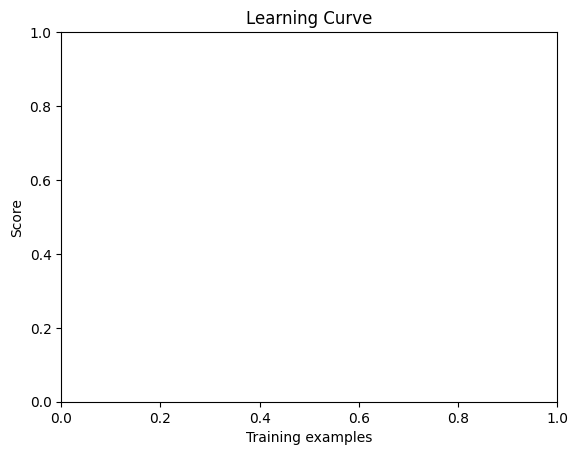

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# Load the training data
training_data = pd.read_csv("Filter data.csv")

# Define the features (parameters) and the target variable
features = ["ALCDAY5", "SLEPTIM1", "X_AGE_G", "SMOKE100", "SMOKDAY2", "SEX", "X_HISPANC", "X_MRACE1",
            "MARITAL", "GENHLTH", "HLTHPLN1", "EDUCA", "INCOME2", "X_BMI5CAT", "EXERANY2", "ALCGRP",
            "DRKWEEKLY", "ASTHMA4", "AGE2", "AGE3", "AGE4", "AGE5", "AGE6", "NEVERSMK"]
target = "ASTHMA3"

# Split the data into features (X) and the target variable (y)
X = training_data[features]
y = training_data[target]

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Load the input data for prediction (neglecting ASTHMA3)
input_data = pd.read_csv("Testing.csv")
X_input = input_data[features]  # Use the same features as in the training data

# Predict whether the person is asthmatic or not
predictions = model.predict(X_input)

# Check the accuracy of the model on the input data (if you have the ground truth)
# You can load the ground truth in a separate CSV file and compare it with predictions.

# Create a learning curve to visualize model performance
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(model, "Learning Curve", X, y, cv=cv)

# Display the predictions and store them in a CSV file
input_data["Predicted_ASTHMA3"] = predictions
print(input_data["Predicted_ASTHMA3"])

input_data.to_csv("output.csv", index=False)  # Save the input data with predictions

plt.show()


0       1
1       2
2       2
3       2
4       2
       ..
5407    2
5408    2
5409    2
5410    2
5411    2
Name: Predicted_ASTHMA3, Length: 5412, dtype: int64


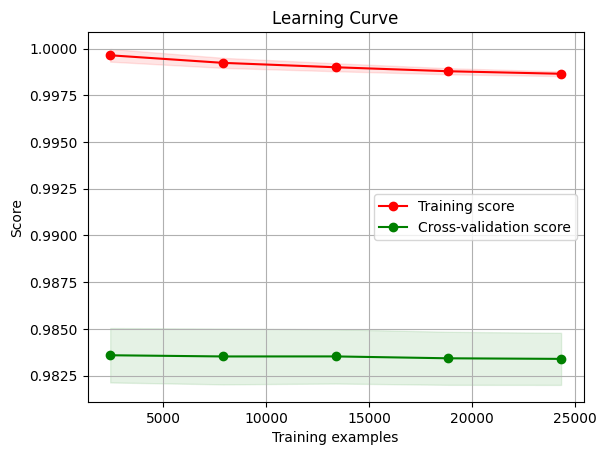

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest classifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# Load the training data
training_data = pd.read_csv("SD.csv")

# Define the features (parameters) and the target variable
features = ["ALCDAY5", "SLEPTIM1", "X_AGE_G", "SMOKE100", "SMOKDAY2", "SEX", "X_HISPANC", "X_MRACE1",
            "MARITAL", "GENHLTH", "HLTHPLN1", "EDUCA", "INCOME2", "X_BMI5CAT", "EXERANY2", "ALCGRP",
            "DRKWEEKLY", "ASTHMA4", "AGE2", "AGE3", "AGE4", "AGE5", "AGE6", "NEVERSMK"]
target = "ASTHMA3"

# Split the data into features (X) and the target variable (y)
X = training_data[features]
y = training_data[target]

# Create and train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=0)  # You can adjust the number of trees and other parameters
model.fit(X, y)

# Load the input data for prediction (neglecting ASTHMA3)
input_data = pd.read_csv("input.csv")
X_input = input_data[features]  # Use the same features as in the training data

# Predict whether the person is asthmatic or not
predictions = model.predict(X_input)

# Check the accuracy of the model on the input data (if you have the ground truth)
# You can load the ground truth in a separate CSV file and compare it with predictions.

# Create a learning curve to visualize model performance
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(model, "Learning Curve", X, y, cv=cv)

# Display the predictions and store them in a CSV file
input_data["Predicted_ASTHMA3"] = predictions
print(input_data["Predicted_ASTHMA3"])

input_data.to_csv("output_random_forest.csv", index=False)  # Save the input data with predictions

plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import csv

# Load the dataset
data = pd.read_csv("Sample.csv")

# Define the features (X) and the target (y)
X = data[['ALCDAY5', 'SLEPTIM1', 'X_AGE_G', 'SMOKDAY2', 'SEX', 'X_HISPANC', 'X_MRACE1',
          'MARITAL', 'GENHLTH', 'HLTHPLN1', 'EDUCA', 'INCOME2', 'X_BMI5CAT', 'EXERANY2',
          'ALCGRP', 'DRKWEEKLY', 'ASTHMA4', 'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6']]
y = data['ASTHMA3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a machine learning model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: {:.2f}%".format(accuracy * 100))

# Load new data for prediction
new_data = pd.read_csv("Testing.csv")  # Replace "new_input.csv" with your new data file

# Ensure new data only contains features used in training
new_data = new_data[['ALCDAY5', 'SLEPTIM1', 'X_AGE_G', 'SMOKDAY2', 'SEX', 'X_HISPANC', 'X_MRACE1',
                     'MARITAL', 'GENHLTH', 'HLTHPLN1', 'EDUCA', 'INCOME2', 'X_BMI5CAT', 'EXERANY2',
                     'ALCGRP', 'DRKWEEKLY', 'ASTHMA4', 'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6']]

# Make predictions on the new data
new_predictions = model.predict(new_data)

# Store the results in a CSV file
new_data['Predicted_ASTHMA3'] = new_predictions
new_data.to_csv("RF_output.csv", index=False)


Model Accuracy: 98.70%


RF

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib  # Import joblib for model persistence

# Load the training data
train_data = pd.read_csv('Sample.csv')

# Load the testing data (with 'ASTHMA3' dropped)
test_data = pd.read_csv('Testing.csv')


# Define the features and target variable
features = [
    'ALCDAY5', 'SLEPTIM1', 'X_AGE_G', 'SMOKDAY2', 'SEX', 'X_HISPANC', 'X_MRACE1',
    'MARITAL', 'GENHLTH', 'HLTHPLN1', 'EDUCA', 'INCOME2', 'X_BMI5CAT', 'EXERANY2', 'ALCGRP',
    'DRKWEEKLY', 'ASTHMA4', 'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6'
]
target = 'ASTHMA3'

# Split the training data into features and labels
X = train_data[features]
y = train_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate accuracy on the testing set
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Save the trained model to a file for future use using joblib
joblib.dump(clf, 'RF_asthma_prediction_model.pkl')

# Use the trained model to predict asthma on the input data
input_features = test_data[features]
predicted_asthma = clf.predict(input_features)

# Add the predictions to the input data
test_data['Predicted_ASTHMA3'] = predicted_asthma

# Save the results to a CSV file
test_data.to_csv('RF_output.csv', index=False)


Model Accuracy: 0.99


KNN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import joblib  # Import joblib for model persistence

# Load the training data
train_data = pd.read_csv('Sample.csv')

# Load the testing data (with 'ASTHMA3' dropped)
test_data = pd.read_csv('Testing.csv')

# Define the features and target variable
features = [
    'ALCDAY5', 'SLEPTIM1', 'X_AGE_G', 'SMOKDAY2', 'SEX', 'X_HISPANC', 'X_MRACE1',
    'MARITAL', 'GENHLTH', 'HLTHPLN1', 'EDUCA', 'INCOME2', 'X_BMI5CAT', 'EXERANY2', 'ALCGRP',
    'DRKWEEKLY', 'ASTHMA4', 'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6'
]
target = 'ASTHMA3'

# Split the training data into features and labels
X = train_data[features]
y = train_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a K-Nearest Neighbors Classifier
clf = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors as needed
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate accuracy on the testing set
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Save the trained model to a file for future use using joblib
joblib.dump(clf, 'knn_asthma_prediction_model.pkl')

# Use the trained model to predict asthma on the input data
input_features = test_data[features]
predicted_asthma = clf.predict(input_features)

# Add the predictions to the input data
test_data['Predicted_ASTHMA3'] = predicted_asthma

# Save the results to a CSV file
test_data.to_csv('knn_output.csv', index=False)


Model Accuracy: 0.92


LR

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib  # Import joblib for model persistence

# Load the training data
train_data = pd.read_csv('Sample.csv')

# Load the testing data (with 'ASTHMA3' dropped)
test_data = pd.read_csv('Testing.csv')

# Define the features and target variable
features = [
    'ALCDAY5', 'SLEPTIM1', 'X_AGE_G', 'SMOKE100', 'SMOKDAY2', 'SEX', 'X_HISPANC', 'X_MRACE1',
    'MARITAL', 'GENHLTH', 'HLTHPLN1', 'EDUCA', 'INCOME2', 'X_BMI5CAT', 'EXERANY2', 'ALCGRP',
    'DRKWEEKLY', 'ASTHMA4', 'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6', 'NEVERSMK'
]
target = 'ASTHMA3'

# Split the training data into features and labels
X = train_data[features]
y = train_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Logistic Regression model
clf = LogisticRegression(max_iter=1000, random_state=42)  # You can adjust max_iter as needed
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate accuracy on the testing set
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Save the trained model to a file for future use using joblib
joblib.dump(clf, 'logistic_regression_asthma_model.pkl')

# Use the trained model to predict asthma on the input data
input_features = test_data[features]
predicted_asthma = clf.predict(input_features)

# Add the predictions to the input data
test_data['Predicted_ASTHMA3'] = predicted_asthma

# Save the results to a CSV file
test_data.to_csv('logistic_regression_output.csv', index=False)


Model Accuracy: 0.99


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DT

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import joblib  # Import joblib for model persistence

# Load the training data
train_data = pd.read_csv('Filter1 data.csv')

# Load the testing data (with 'ASTHMA3' dropped)
test_data = pd.read_csv('Testing.csv')

# Define the features and target variable
features = [
    'ALCDAY5', 'SLEPTIM1', 'X_AGE_G', 'SMOKDAY2', 'SEX', 'X_HISPANC', 'X_MRACE1',
    'MARITAL', 'GENHLTH', 'HLTHPLN1', 'EDUCA', 'INCOME2', 'X_BMI5CAT', 'EXERANY2', 'ALCGRP',
    'DRKWEEKLY', 'ASTHMA4', 'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6'
]
target = 'ASTHMA3'

# Split the training data into features and labels
X = train_data[features]
y = train_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate accuracy on the testing set
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Save the trained model to a file for future use using joblib
joblib.dump(clf, 'decision_tree_asthma_model.pkl')

# Use the trained model to predict asthma on the input data
input_features = test_data[features]
predicted_asthma = clf.predict(input_features)

# Add the predictions to the input data
test_data['Predicted_ASTHMA3'] = predicted_asthma

# Save the results to a CSV file
test_data.to_csv('decision_tree_output.csv', index=False)


Model Accuracy: 1.00


**MIXED ALGO**

In [ ]:
pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 962.2 kB/s eta 0:00:00


Streaming output truncated to the last 5000 lines.
Person 414 is asthmatic according to Random Forest.
Person 415 is asthmatic according to Random Forest.
Person 416 is asthmatic according to Random Forest.
Person 417 is asthmatic according to Random Forest.
Person 418 is asthmatic according to Random Forest.
Person 419 is asthmatic according to Random Forest.
Person 420 is asthmatic according to Random Forest.
Person 421 is asthmatic according to Random Forest.
Person 422 is not asthmatic according to Random Forest.
Person 423 is asthmatic according to Random Forest.
Person 424 is asthmatic according to Random Forest.
Person 425 is not asthmatic according to Random Forest.
Person 426 is asthmatic according to Random Forest.
Person 427 is asthmatic according to Random Forest.
Person 428 is asthmatic according to Random Forest.
Person 429 is asthmatic according to Random Forest.
Person 430 is asthmatic according to Random Forest.
Person 431 is not asthmatic according to Random Forest.
P

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 98.25%
KNN Accuracy: 91.21%
SVM Accuracy: 90.23%
Best Features Selected by Genetic Algorithm:
['ALCDAY5', 'X_AGE_G', 'SMOKDAY2', 'SEX', 'MARITAL', 'GENHLTH', 'HLTHPLN1', 'INCOME2', 'X_BMI5CAT', 'EXERANY2', 'DRKWEEKLY', 'ASTHMA4', 'AGE3', 'AGE5', 'AGE6']
Random Forest with Selected Features (Genetic Algorithm) Accuracy: 98.03%


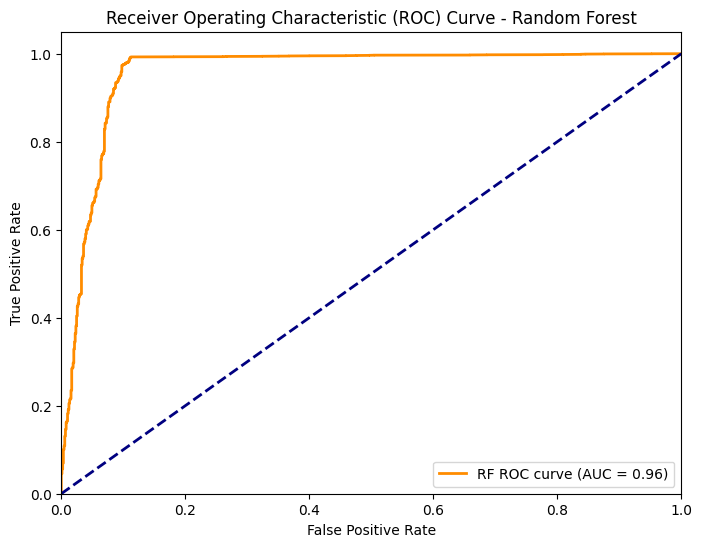

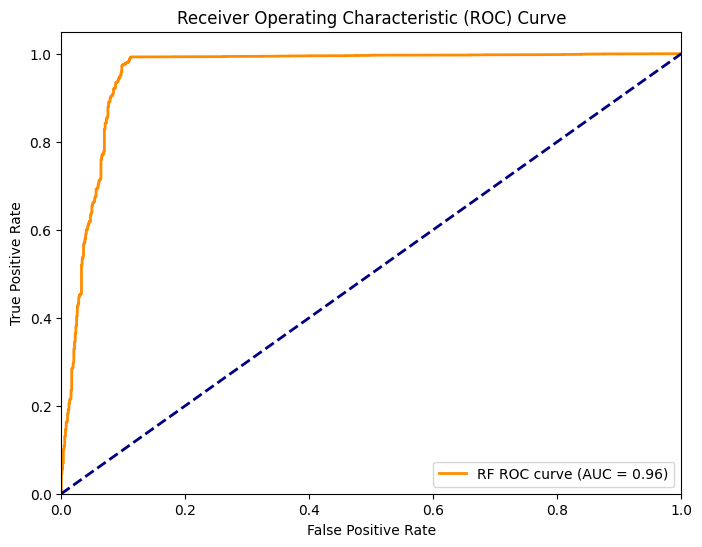

Model: Random Forest
Accuracy: 98.24%
F1 Score: 0.9902
Precision: 0.9878
ROC AUC: 0.9570


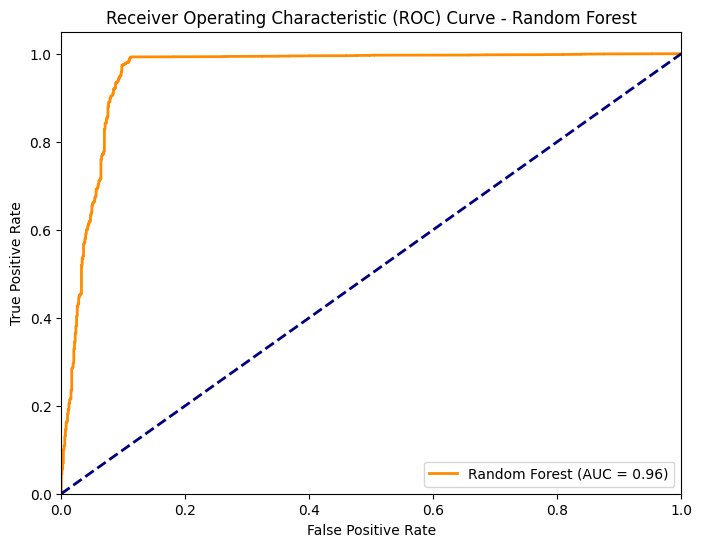

Model: Logistic Regression
Accuracy: 98.25%
F1 Score: 0.9903
Precision: 0.9879
ROC AUC: 0.9513


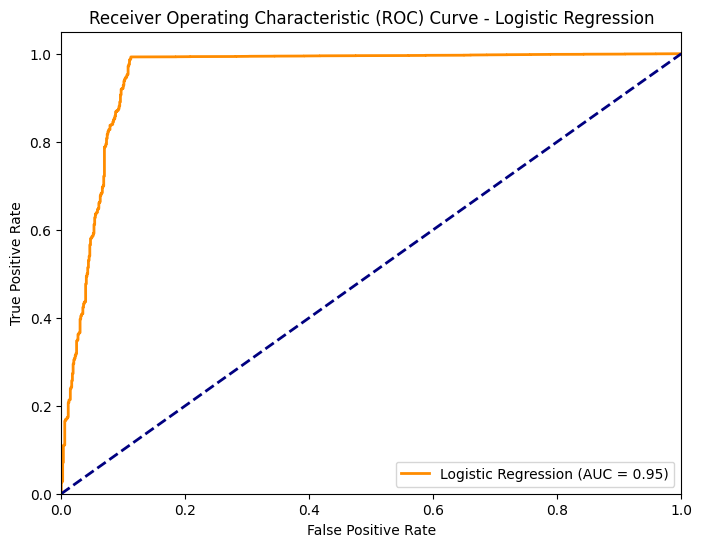

Model: K-Nearest Neighbors (KNN)
Accuracy: 91.21%
F1 Score: 0.9534
Precision: 0.9139
ROC AUC: 0.7820


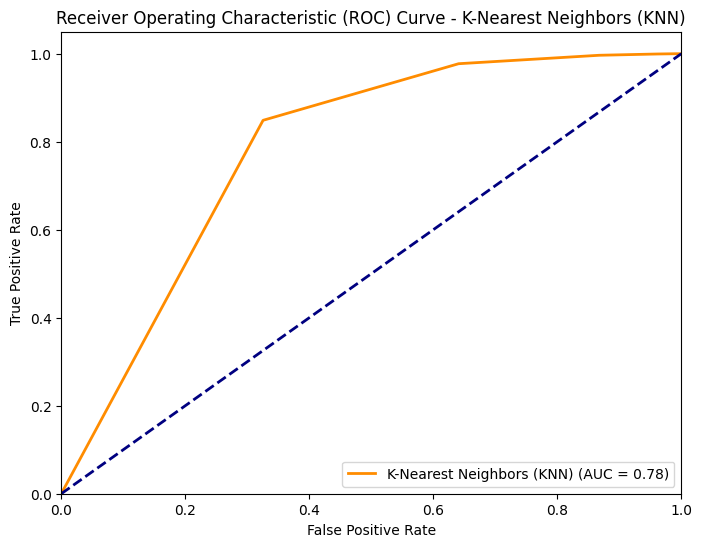

Model: Support Vector Machine (SVM)
Accuracy: 90.23%
F1 Score: 0.9487
Precision: 0.9023
ROC AUC: 0.9478


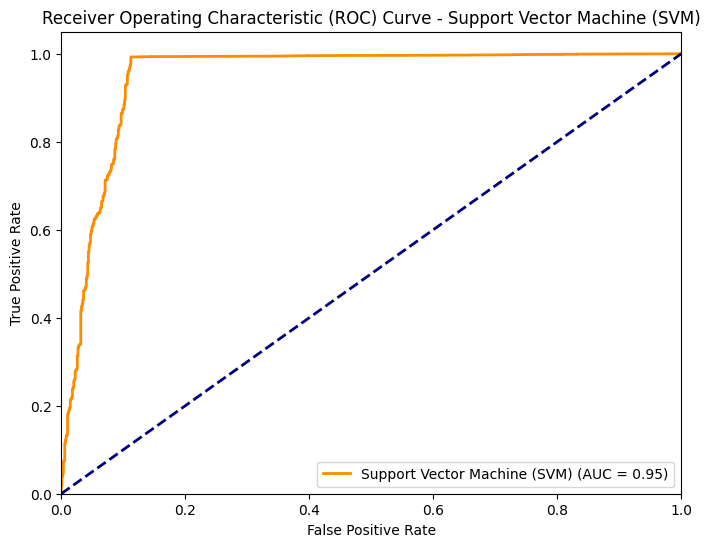

Model: Random Forest (Genetic Algorithm)
Accuracy: 98.03%
F1 Score: 0.9891
Precision: 0.9872
ROC AUC: 0.9538


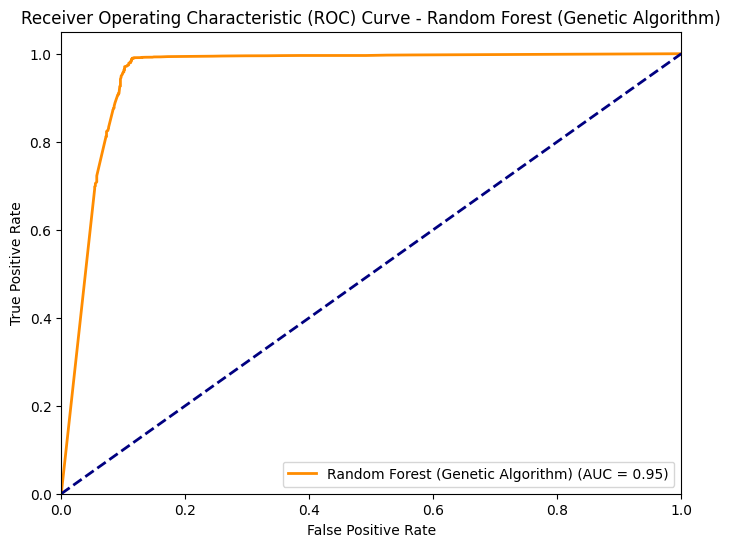

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc

# Step 1: Load and preprocess the dataset
data = pd.read_csv("Sample.csv")

# Select the relevant features (columns)
features = [
    'ALCDAY5', 'SLEPTIM1', 'X_AGE_G','SMOKDAY2', 'SEX',
    'X_HISPANC', 'X_MRACE1', 'MARITAL', 'GENHLTH', 'HLTHPLN1', 'EDUCA',
    'INCOME2', 'X_BMI5CAT', 'EXERANY2', 'ALCGRP', 'DRKWEEKLY', 'ASTHMA4',
    'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6'
]

# Create X (features) and y (target) datasets
X = data[features]
y = data['ASTHMA3']

# Convert labels 1 to 0 and 2 to 1
y = [0 if label == 1 else 1 for label in y]

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize a Random Forest Classifier with hyperparameter tuning
param_grid = {
    'n_estimators': [100],  # You can experiment with other values
    'max_depth': [10],      # Adjust max_depth as needed
    'min_samples_split': [5],
    'min_samples_leaf': [2]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_rf_model = grid_search.best_estimator_

# Step 4: Make predictions for the user input data
input_data = pd.read_csv("Testing.csv")
user_predictions_rf = best_rf_model.predict(input_data[features])

# Step 5: Store the results in a new CSV file for Random Forest
result_df_rf = pd.DataFrame({'Prediction_RF': user_predictions_rf})
result_df_rf.to_csv("RF_results.csv", index=False)

# Step 6: Print whether the person is asthmatic or not based on the Random Forest model's predictions
for i, prediction in enumerate(user_predictions_rf):
    if prediction == 1:
        print(f"Person {i+1} is asthmatic according to Random Forest.")
    else:
        print(f"Person {i+1} is not asthmatic according to Random Forest.")

# Step 7: Calculate and print the overall accuracy of the Random Forest model on the test set
accuracy_rf = accuracy_score(y_test, best_rf_model.predict(X_test))
print(f"Random Forest Overall accuracy on the test set: {accuracy_rf * 100:.2f}%")

# Calculate ROC curve and AUC for Random Forest
y_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'RF ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')

# Implement Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
lr_predictions = logistic_regression.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%")

# Implement K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")

# Implement Support Vector Machine (SVM)
svm = SVC(probability=True)
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")

# Implement Genetic Algorithm for Feature Selection
# Define a fitness function (you can use AUC as the fitness score)
def evaluate(individual, X, y):
    selected_features = [features[i] for i in range(len(individual)) if individual[i]]
    X_selected = X[selected_features]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

    # Train and evaluate a model (e.g., Random Forest) on the selected features
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    return roc_auc,

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", np.random.choice, [False, True])
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(features))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate, X=X, y=y)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Genetic Algorithm
population = toolbox.population(n=50)
gen, best_auc = algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=10, verbose=False)

best_individual = tools.selBest(population, k=1)[0]
selected_features_genetic = [features[i] for i in range(len(best_individual)) if best_individual[i]]
print("Best Features Selected by Genetic Algorithm:")
print(selected_features_genetic)

# Train and evaluate the final model with the selected features using Random Forest
X_selected_genetic = X[selected_features_genetic]
X_train_genetic, X_test_genetic, y_train_genetic, y_test_genetic = train_test_split(
    X_selected_genetic, y, test_size=0.3, random_state=42
)
final_rf_model_genetic = RandomForestClassifier(random_state=42)
final_rf_model_genetic.fit(X_train_genetic, y_train_genetic)
final_rf_predictions_genetic = final_rf_model_genetic.predict(X_test_genetic)
final_rf_accuracy_genetic = accuracy_score(y_test_genetic, final_rf_predictions_genetic)
print(f"Random Forest with Selected Features (Genetic Algorithm) Accuracy: {final_rf_accuracy_genetic * 100:.2f}%")


# Display ROC curves for Random Forest and Genetic Algorithm
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'RF ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Evaluate and compare the models
models = [
    ("Random Forest", best_rf_model),
    ("Logistic Regression", logistic_regression),
    ("K-Nearest Neighbors (KNN)", knn),
    ("Support Vector Machine (SVM)", svm),
    ("Random Forest (Genetic Algorithm)", final_rf_model_genetic)
]

for model_name, model in models:
    # Predictions
    if "Genetic Algorithm" in model_name:
        X_test_model = X_test_genetic
    else:
        X_test_model = X_test

    y_pred = model.predict(X_test_model)
    y_proba = model.predict_proba(X_test_model)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Print metrics
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
Person 416 (Gradient Boosting) is asthmatic.
Person 417 (Gradient Boosting) is asthmatic.
Person 418 (Gradient Boosting) is asthmatic.
Person 419 (Gradient Boosting) is asthmatic.
Person 420 (Gradient Boosting) is asthmatic.
Person 421 (Gradient Boosting) is asthmatic.
Person 422 (Gradient Boosting) is not asthmatic.
Person 423 (Gradient Boosting) is asthmatic.
Person 424 (Gradient Boosting) is asthmatic.
Person 425 (Gradient Boosting) is not asthmatic.
Person 426 (Gradient Boosting) is asthmatic.
Person 427 (Gradient Boosting) is asthmatic.
Person 428 (Gradient Boosting) is asthmatic.
Person 429 (Gradient Boosting) is asthmatic.
Person 430 (Gradient Boosting) is asthmatic.
Person 431 (Gradient Boosting) is not asthmatic.
Person 432 (Gradient Boosting) is asthmatic.
Person 433 (Gradient Boosting) is asthmatic.
Person 434 (Gradient Boosting) is asthmatic.
Person 435 (Gradient Boosting) is asthmatic.
Person 436 (Gradient Boosting) is ast

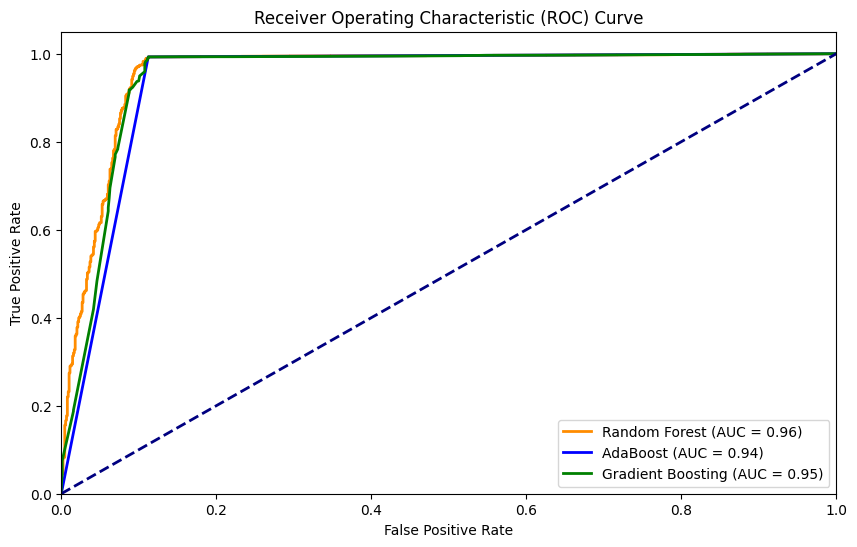

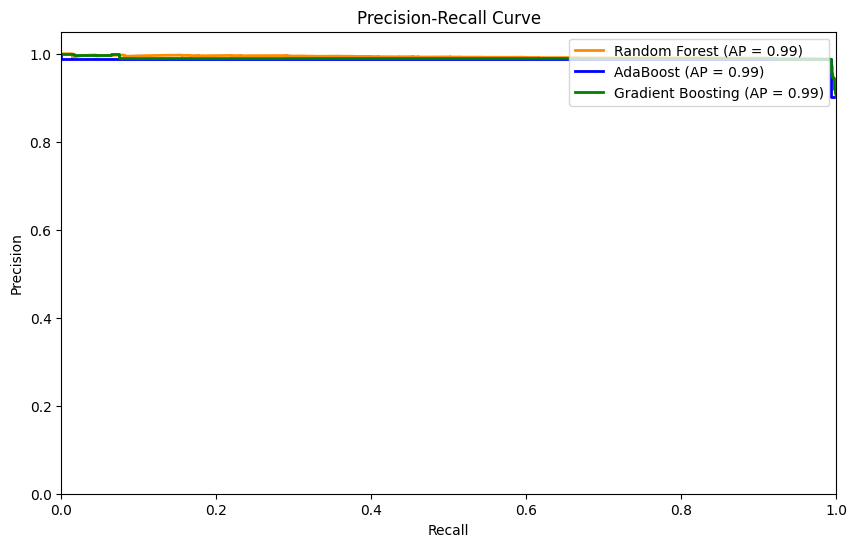

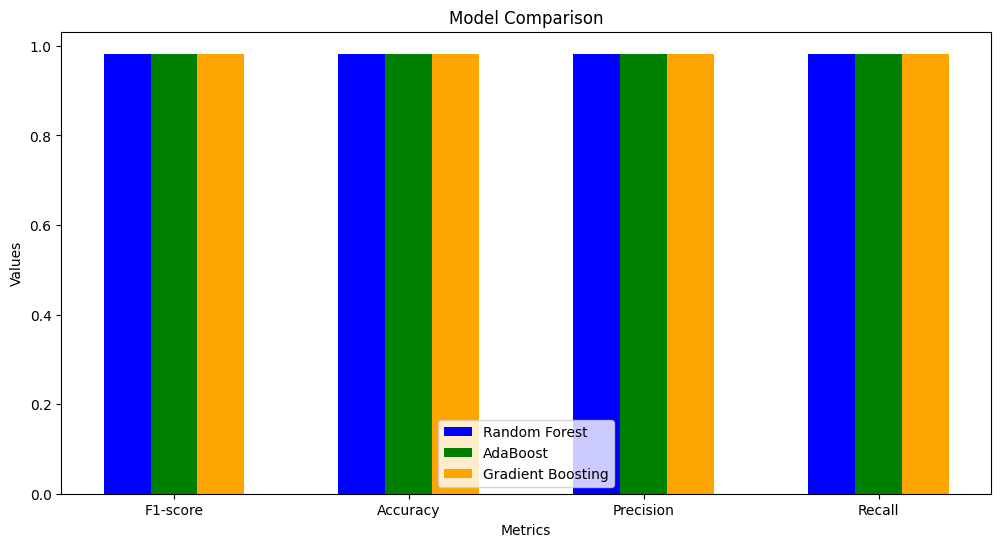

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       891
           1       0.99      0.99      0.99      8233

    accuracy                           0.98      9124
   macro avg       0.96      0.94      0.95      9124
weighted avg       0.98      0.98      0.98      9124

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       891
           1       0.99      0.99      0.99      8233

    accuracy                           0.98      9124
   macro avg       0.96      0.94      0.95      9124
weighted avg       0.98      0.98      0.98      9124

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       891
           1       0.99      0.99      0.99      8233

    accuracy                           0.98      9124
   macro avg      

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

# Step 1: Load and preprocess the dataset
data = pd.read_csv("Sample.csv")

# Select the relevant features (columns)
features = [
    'ALCDAY5',  'X_AGE_G', 'SMOKDAY2', 'SEX',
    'X_HISPANC', 'X_MRACE1', 'MARITAL', 'GENHLTH', 'HLTHPLN1', 'EDUCA',
    'INCOME2', 'X_BMI5CAT', 'EXERANY2', 'ALCGRP', 'DRKWEEKLY', 'ASTHMA4','AGE2','AGE3','AGE4','AGE5','AGE6']

X = data[features]
y = data['ASTHMA3']

# Convert labels 1 to 0 and 2 to 1
y = [0 if label == 1 else 1 for label in y]

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize and tune models with GridSearchCV
# Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                             n_jobs=-1, verbose=1, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

best_rf_model = rf_grid_search.best_estimator_

# AdaBoost
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

ada_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), random_state=42)
ada_grid_search = GridSearchCV(ada_model, ada_param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                               n_jobs=-1, verbose=1, scoring='accuracy')
ada_grid_search.fit(X_train, y_train)

best_ada_model = ada_grid_search.best_estimator_

# Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}

gb_model = GradientBoostingClassifier(random_state=42)
gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                             n_jobs=-1, verbose=1, scoring='accuracy')
gb_grid_search.fit(X_train, y_train)

best_gb_model = gb_grid_search.best_estimator_

# Step 4: Make predictions for the user input data
input_data = pd.read_csv("Testing.csv")

user_predictions_rf = best_rf_model.predict(input_data[features])
user_predictions_ada = best_ada_model.predict(input_data[features])
user_predictions_gb = best_gb_model.predict(input_data[features])

# Step 5: Store the results in new CSV files
result_df_rf = pd.DataFrame({'Prediction_RF': user_predictions_rf})
result_df_rf.to_csv("RF_results.csv", index=False)

result_df_ada = pd.DataFrame({'Prediction_Ada': user_predictions_ada})
result_df_ada.to_csv("AdaBoost_results.csv", index=False)

result_df_gb = pd.DataFrame({'Prediction_GB': user_predictions_gb})
result_df_gb.to_csv("GradientBoosting_results.csv", index=False)

# Step 6: Print whether the person is asthmatic or not based on the model's predictions
for i, prediction in enumerate(user_predictions_rf):
    if prediction == 1:
        print(f"Person {i+1} (Random Forest) is asthmatic.")
    else:
        print(f"Person {i+1} (Random Forest) is not asthmatic.")

for i, prediction in enumerate(user_predictions_ada):
    if prediction == 1:
        print(f"Person {i+1} (AdaBoost) is asthmatic.")
    else:
        print(f"Person {i+1} (AdaBoost) is not asthmatic.")

for i, prediction in enumerate(user_predictions_gb):
    if prediction == 1:
        print(f"Person {i+1} (Gradient Boosting) is asthmatic.")
    else:
        print(f"Person {i+1} (Gradient Boosting) is not asthmatic.")

# Step 7: Calculate and print the overall accuracy of the models on the test set
accuracy_rf = accuracy_score(y_test, best_rf_model.predict(X_test))
accuracy_ada = accuracy_score(y_test, best_ada_model.predict(X_test))
accuracy_gb = accuracy_score(y_test, best_gb_model.predict(X_test))

print(f"Random Forest - Overall accuracy on the test set: {accuracy_rf * 100:.2f}%")
print(f"AdaBoost - Overall accuracy on the test set: {accuracy_ada * 100:.2f}%")
print(f"Gradient Boosting - Overall accuracy on the test set: {accuracy_gb * 100:.2f}%")

# Calculate ROC curves and AUC for all models
y_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]
y_proba_ada = best_ada_model.predict_proba(X_test)[:, 1]
y_proba_gb = best_gb_model.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_ada, tpr_ada, _ = roc_curve(y_test, y_proba_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_ada, tpr_ada, color='blue', lw=2, label=f'AdaBoost (AUC = {roc_auc_ada:.2f})')
plt.plot(fpr_gb, tpr_gb, color='green', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate Precision-Recall curves and Average Precision for all models
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)
average_precision_rf = average_precision_score(y_test, y_proba_rf)

precision_ada, recall_ada, _ = precision_recall_curve(y_test, y_proba_ada)
average_precision_ada = average_precision_score(y_test, y_proba_ada)

precision_gb, recall_gb, _ = precision_recall_curve(y_test, y_proba_gb)
average_precision_gb = average_precision_score(y_test, y_proba_gb)

# Plot Precision-Recall curves
plt.figure(figsize=(10, 6))
plt.step(recall_rf, precision_rf, color='darkorange', where='post', lw=2, label=f'Random Forest (AP = {average_precision_rf:.2f})')
plt.step(recall_ada, precision_ada, color='blue', where='post', lw=2, label=f'AdaBoost (AP = {average_precision_ada:.2f})')
plt.step(recall_gb, precision_gb, color='green', where='post', lw=2, label=f'Gradient Boosting (AP = {average_precision_gb:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc='upper right')
plt.show()

# Step 8: Evaluate the models on the test set
y_pred_rf = best_rf_model.predict(X_test)
y_pred_ada = best_ada_model.predict(X_test)
y_pred_gb = best_gb_model.predict(X_test)

# Step 9: Calculate F1-score, accuracy, precision, and recall
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

f1_ada = f1_score(y_test, y_pred_ada, average='weighted')
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada, average='weighted')
recall_ada = recall_score(y_test, y_pred_ada, average='weighted')

f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')

# Step 10: Compare the models using bar charts
metrics = ['F1-score', 'Accuracy', 'Precision', 'Recall']
rf_values = [f1_rf, accuracy_rf, precision_rf, recall_rf]
ada_values = [f1_ada, accuracy_ada, precision_ada, recall_ada]
gb_values = [f1_gb, accuracy_gb, precision_gb, recall_gb]

x = range(len(metrics))

plt.figure(figsize=(12, 6))
plt.bar(x, rf_values, width=0.2, label='Random Forest', align='center', color='blue')
plt.bar([i + 0.2 for i in x], ada_values, width=0.2, label='AdaBoost', align='center', color='green')
plt.bar([i + 0.4 for i in x], gb_values, width=0.2, label='Gradient Boosting', align='center', color='orange')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Comparison')
plt.xticks([i + 0.2 for i in x], metrics)
plt.legend()
plt.show()

# Step 11: Display classification report
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_rf_bin = lb.transform(y_pred_rf)
y_pred_ada_bin = lb.transform(y_pred_ada)
y_pred_gb_bin = lb.transform(y_pred_gb)

print("Random Forest Classification Report:")
print(classification_report(y_test_bin, y_pred_rf_bin, target_names=[str(c) for c in lb.classes_]))

print("AdaBoost Classification Report:")
print(classification_report(y_test_bin, y_pred_ada_bin, target_names=[str(c) for c in lb.classes_]))

print("Gradient Boosting Classification Report:")
print(classification_report(y_test_bin, y_pred_gb_bin, target_names=[str(c) for c in lb.classes_]))


            ALCDAY5   X_AGE_G   ASTHMA3  SMOKDAY2       SEX  X_HISPANC  \
ALCDAY5    1.000000  0.090221 -0.044435 -0.001306  0.015509  -0.006104   
X_AGE_G    0.090221  1.000000  0.024467  0.277228 -0.193887   0.101746   
ASTHMA3   -0.044435  0.024467  1.000000  0.016494 -0.067996   0.008374   
SMOKDAY2  -0.001306  0.277228  0.016494  1.000000 -0.079164   0.013998   
SEX        0.015509 -0.193887 -0.067996 -0.079164  1.000000  -0.015064   
X_HISPANC -0.006104  0.101746  0.008374  0.013998 -0.015064   1.000000   
X_MRACE1   0.034871 -0.098588 -0.036730 -0.069728  0.045769  -0.144490   
MARITAL    0.031691 -0.131391 -0.022298 -0.137518  0.090843  -0.025861   
GENHLTH    0.192185  0.115207 -0.127215 -0.069190 -0.031032  -0.006179   
HLTHPLN1   0.004765 -0.191557 -0.010975 -0.141702  0.032937  -0.014682   
EDUCA     -0.165529  0.002059  0.019533  0.106333  0.075930   0.008612   
INCOME2   -0.218377 -0.034197  0.079986  0.157241 -0.020982   0.042102   
X_BMI5CAT  0.024981 -0.024960 -0.02857

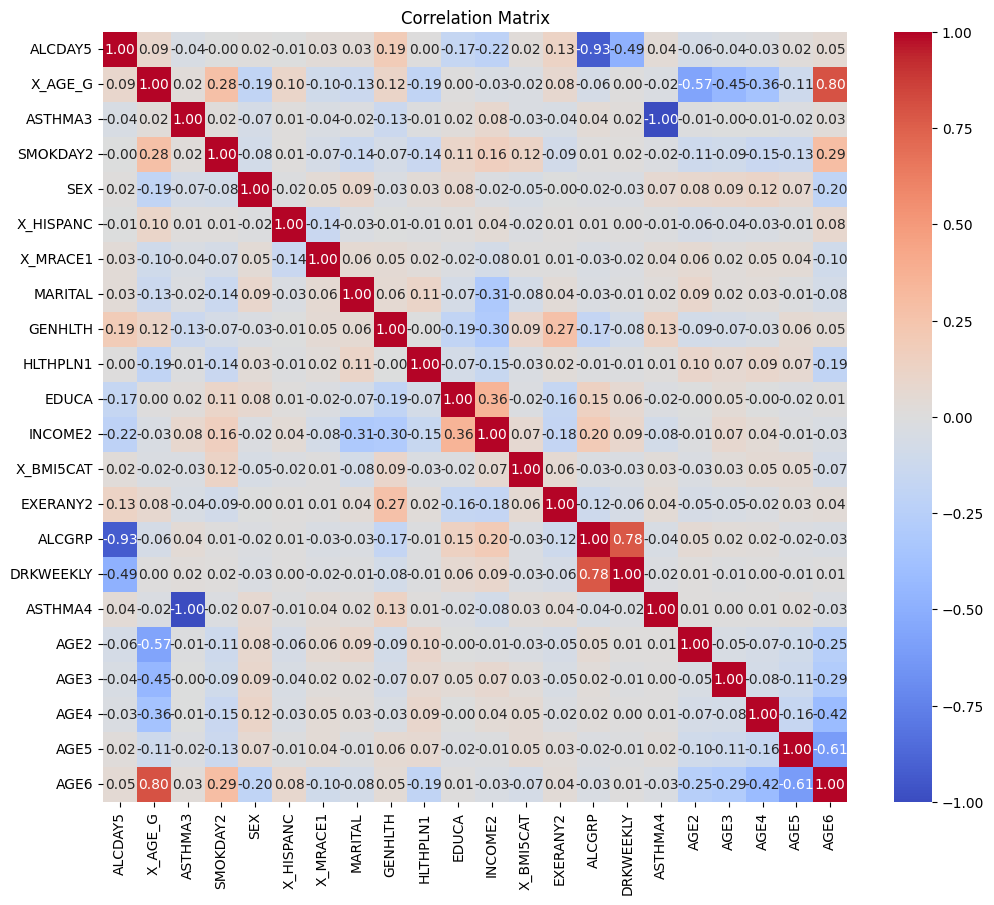

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data into a DataFrame (replace 'data.csv' with your data file)
data = pd.read_csv('Filter1 data.csv')

# Select the columns of interest
columns_of_interest = [
    'ALCDAY5', 'X_AGE_G', 'ASTHMA3', 'SMOKDAY2', 'SEX',
    'X_HISPANC', 'X_MRACE1', 'MARITAL', 'GENHLTH', 'HLTHPLN1', 'EDUCA',
    'INCOME2', 'X_BMI5CAT', 'EXERANY2', 'ALCGRP', 'DRKWEEKLY', 'ASTHMA4', 'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6'
]

data = data[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Print the correlation values
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Save the correlation matrix to a CSV file
correlation_matrix.to_csv('correlation_matrix.csv')


            ALCDAY5   X_AGE_G   ASTHMA3  SMOKDAY2       SEX  X_HISPANC  \
ALCDAY5    1.000000  0.086459 -0.005739 -0.005249 -0.004716   0.025429   
X_AGE_G    0.086459  1.000000 -0.048063  0.241324 -0.065285   0.017195   
ASTHMA3   -0.005739 -0.048063  1.000000  0.038089 -0.061947   0.087033   
SMOKDAY2  -0.005249  0.241324  0.038089  1.000000 -0.043539  -0.004095   
SEX       -0.004716 -0.065285 -0.061947 -0.043539  1.000000  -0.010224   
X_HISPANC  0.025429  0.017195  0.087033 -0.004095 -0.010224   1.000000   
X_MRACE1   0.049860 -0.087128 -0.038263 -0.097848  0.015905  -0.012616   
MARITAL    0.081905 -0.039464 -0.038147 -0.208322  0.029745  -0.006125   
GENHLTH    0.140796  0.079727 -0.108627 -0.088644 -0.000024  -0.032589   
HLTHPLN1   0.035772 -0.096472  0.002371 -0.097282  0.017274   0.002385   
EDUCA     -0.192013 -0.003068 -0.030174  0.155477  0.025066   0.007468   
INCOME2   -0.237292 -0.074973  0.100232  0.203943 -0.007666   0.010226   
X_BMI5CAT  0.005242 -0.045044 -0.03225

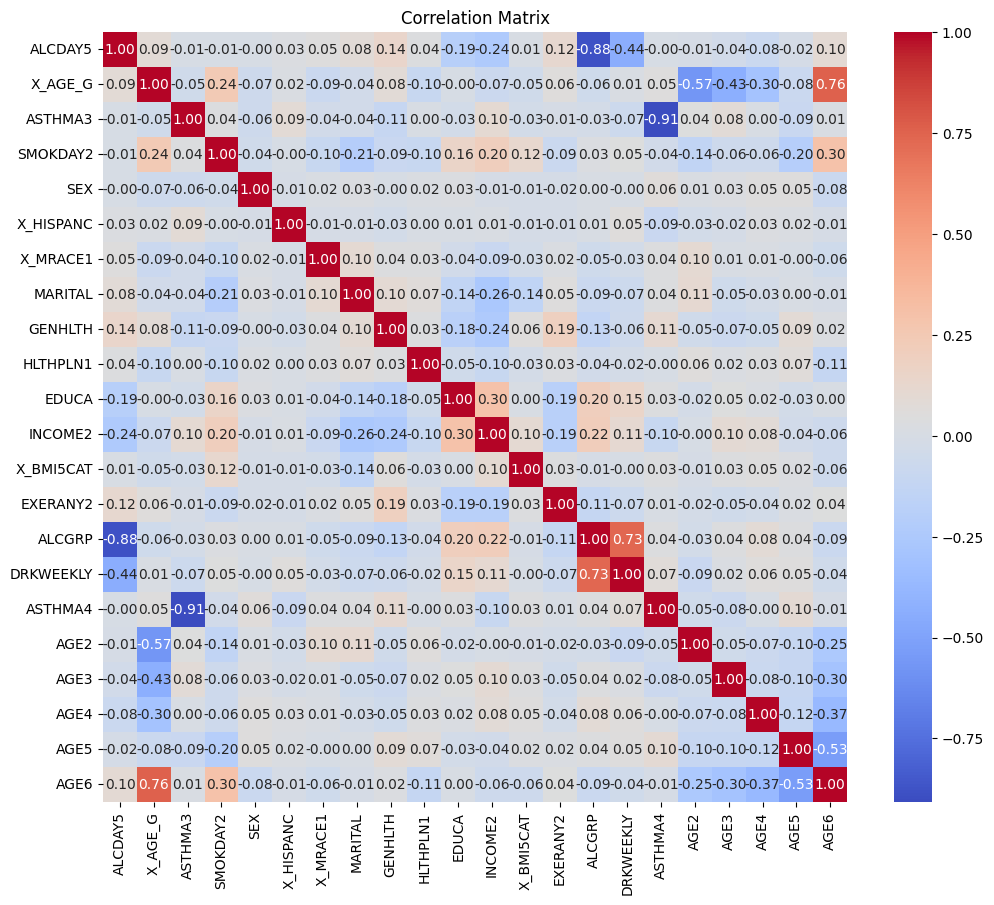

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data into a DataFrame (replace 'data.csv' with your data file)
data = pd.read_csv('Sample.csv')

# Select the columns of interest
columns_of_interest = [
    'ALCDAY5', 'X_AGE_G', 'ASTHMA3', 'SMOKDAY2', 'SEX',
    'X_HISPANC', 'X_MRACE1', 'MARITAL', 'GENHLTH', 'HLTHPLN1', 'EDUCA',
    'INCOME2', 'X_BMI5CAT', 'EXERANY2', 'ALCGRP', 'DRKWEEKLY', 'ASTHMA4', 'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6'
]

data = data[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Print the correlation values
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Save the correlation matrix to a CSV file
correlation_matrix.to_csv('correlation_matrix1.csv')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('Sample.csv')  # Replace 'your_dataset.csv' with the actual filename

# Select features and target variable
features = ['ALCDAY5', 'SLEPTIM1', 'X_AGE_G', 'SMOKDAY2', 'SEX', 'X_HISPANC', 'X_MRACE1',
            'MARITAL', 'GENHLTH', 'HLTHPLN1', 'EDUCA', 'INCOME2', 'X_BMI5CAT', 'EXERANY2', 'ALCGRP',
            'DRKWEEKLY', 'ASTHMA4', 'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6']
target = 'ASTHMA3'

# Split the data into features and target
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on training and testing data
train_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

# Calculate accuracy on training and testing data
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Check for overfitting
if train_accuracy > test_accuracy:
    print("The model may be overfitting the training data.")
else:
    print("The model generalizes well to unseen data.")


Training Accuracy: 1.00
Testing Accuracy: 0.96
The model may be overfitting the training data.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('Sample.csv')  # Replace 'your_dataset.csv' with the actual filename

# Select features and target variable
features = ['ALCDAY5', 'SLEPTIM1', 'X_AGE_G', 'SMOKE100', 'SMOKDAY2', 'SEX', 'X_HISPANC', 'X_MRACE1',
            'MARITAL', 'GENHLTH', 'HLTHPLN1', 'EDUCA', 'INCOME2', 'X_BMI5CAT', 'EXERANY2', 'ALCGRP',
            'DRKWEEKLY', 'ASTHMA4', 'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6', 'NEVERSMK']
target = 'ASTHMA3'

# Split the data into features and target
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train, y_train)

# Make predictions on testing data
test_preds = best_rf_classifier.predict(X_test)

# Calculate accuracy on testing data
test_accuracy = accuracy_score(y_test, test_preds)

print(f"Testing Accuracy (after tuning hyperparameters): {test_accuracy:.2f}")

# Save the new dataset without overfitting
X_new = pd.concat([X_train, X_test], ignore_index=True)
y_new = pd.concat([y_train, y_test], ignore_index=True)
new_data = pd.concat([X_new, y_new], axis=1)
new_data.to_csv('dataset_without_overfitting.csv', index=False)


Fitting 10 folds for each of 81 candidates, totalling 810 fits


KeyboardInterrupt: 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Scores:
Logistic Regression: 0.98
Decision Tree: 0.96
Random Forest: 0.98
Support Vector Machine: 0.90


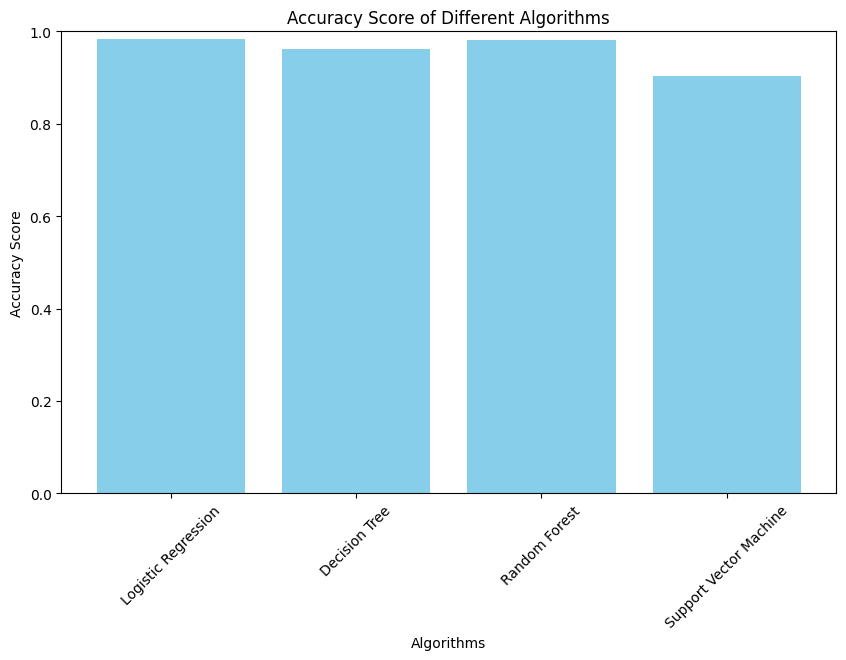

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

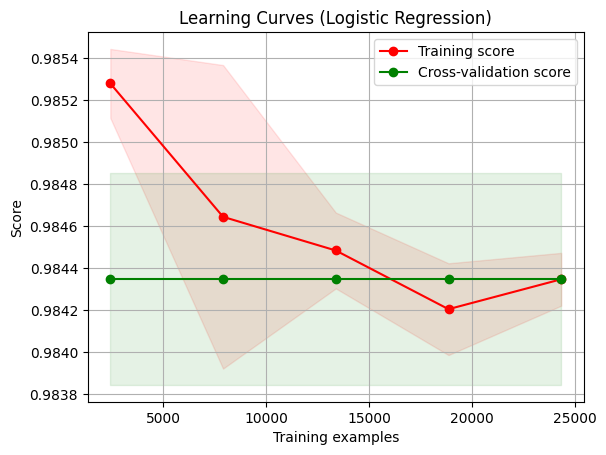

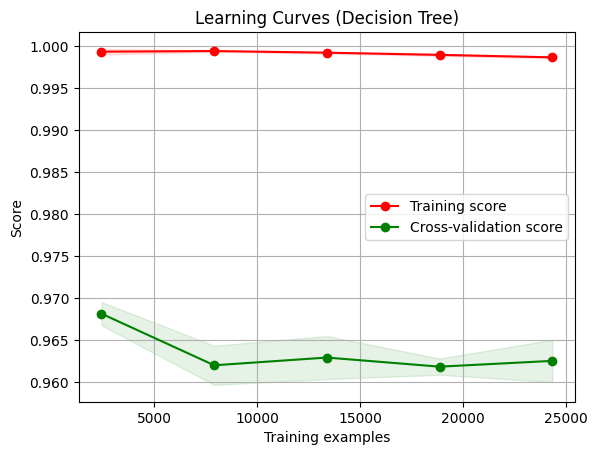

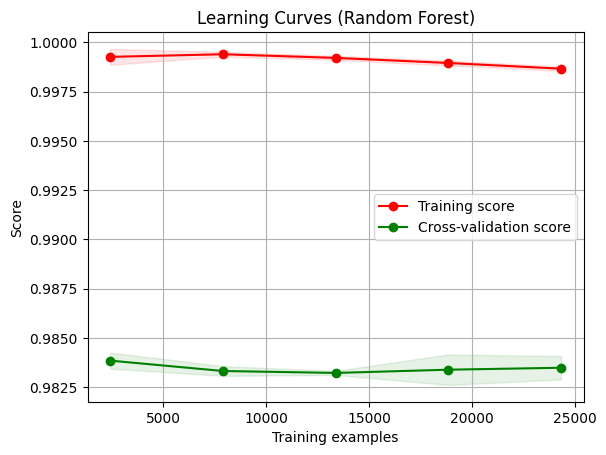

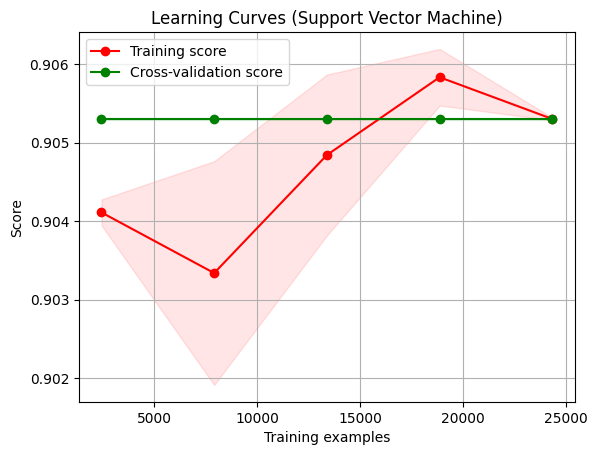

Predictions using Logistic Regression:
[2 1 1 ... 1 2 2]
Predictions using Decision Tree:
[2 1 2 ... 1 2 2]
Predictions using Random Forest:
[2 1 2 ... 1 2 2]
Predictions using Support Vector Machine:
[2 2 2 ... 2 2 2]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("Sample.csv")  # Replace "your_dataset.csv" with your dataset file

# Define features (X) and target (y)
X = data[['ALCDAY5', 'SLEPTIM1', 'X_AGE_G', 'SMOKE100', 'SMOKDAY2', 'SEX', 'X_HISPANC', 'X_MRACE1', 'MARITAL',
          'GENHLTH', 'HLTHPLN1', 'EDUCA', 'INCOME2', 'X_BMI5CAT', 'EXERANY2', 'ALCGRP', 'DRKWEEKLY', 'ASTHMA4',
          'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6', 'NEVERSMK']]
y = data['ASTHMA3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Train and evaluate each model
accuracy_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy

# Print accuracy scores
print("Accuracy Scores:")
for name, accuracy in accuracy_scores.items():
    print(f"{name}: {accuracy:.2f}")

# Plot accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score of Different Algorithms')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Plot learning curves for each algorithm
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

for name, model in models.items():
    title = f"Learning Curves ({name})"
    plot_learning_curve(model, title, X, y, cv=5)
    plt.show()

# Load new data for prediction
new_data = pd.read_csv("Testing.csv")  # Replace "new_data.csv" with your new data file

# Predict asthma using each model
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(new_data)

# Display predictions
for name, prediction in predictions.items():
    print(f"Predictions using {name}:")
    print(prediction)


In [ ]:
pip install pandas numpy sklearn xgboost matplotlib seaborn


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Epoch 1/10
685/685 [==============================] - 11s 7ms/step - loss: 0.1773 - accuracy: 0.9727 - val_loss: 0.0885 - val_accuracy: 0.9815
Epoch 2/10
685/685 [==============================] - 5s 7ms/step - loss: 0.0734 - accuracy: 0.9851 - val_loss: 0.0882 - val_accuracy: 0.9815
Epoch 3/10
685/685 [==============================] - 4s 6ms/step - loss: 0.0720 - accuracy: 0.9850 - val_loss: 0.0870 - val_accuracy: 0.9815
Epoch 4/10
685/685 [==============================] - 3s 4ms/step - loss: 0.0710 - accuracy: 0.9851 - val_loss: 0.0872 - val_accuracy: 0.9815
Epoch 5/10
685/685 [==============================] - 3s 4ms/step - loss: 0.0703 - accuracy: 0.9851 - val_loss: 0.0875 - val_accuracy: 0.9815
Epoch 6/10
685/685 [==============================] - 3s 4ms/step - loss: 0.0694 - accuracy: 0.9850 - val_loss: 0.0877 - val_accuracy: 0.9815
Epoch 7/10
685/685 [==============================] - 3s 4ms/step - loss: 0.0689 - accuracy: 0.9851 - val_loss: 0.0875 - val_accuracy: 0.9815
Epoch

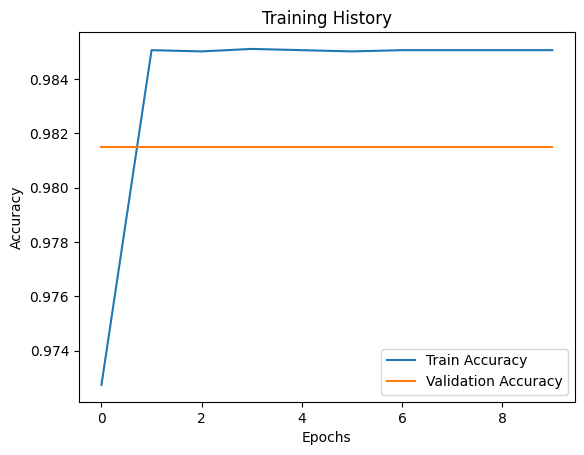

191/191 [==============================] - 1s 2ms/step
Testing accuracy: 0.9824099950682229
F1 Score: 0.9902736114898646
Sensitivity (Recall): 0.992167577413479
Precision: 0.9883868626383596

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       593
           1       0.99      0.99      0.99      5490

    accuracy                           0.98      6083
   macro avg       0.96      0.94      0.95      6083
weighted avg       0.98      0.98      0.98      6083



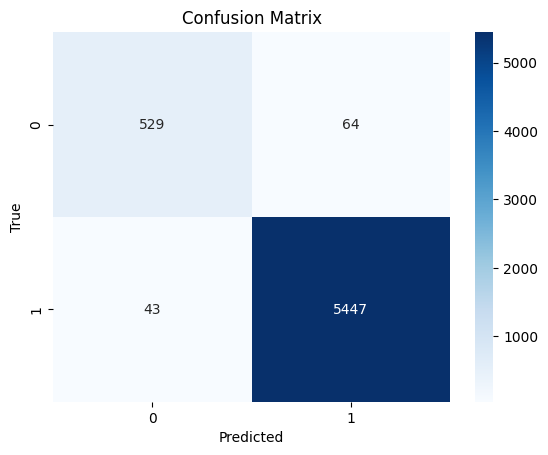

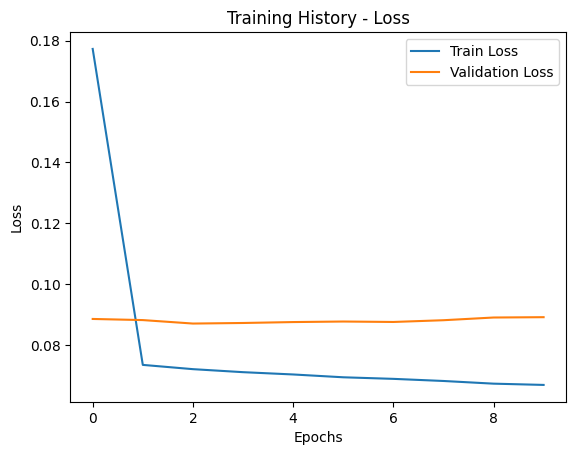

170/170 [==============================] - 0s 2ms/step


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv('Sample.csv')

# Map the target variable values to 0 and 1
data['ASTHMA3'] = data['ASTHMA3'].map({1: 0, 2: 1})

# Separate the target feature
target = data['ASTHMA3']

# Remove the target feature from the dataset
data.drop('ASTHMA3', axis=1, inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM input: [samples, time steps, features]
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.legend()
plt.show()

# Predict on test set
y_test_pred_proba = model.predict(X_test_lstm)
y_test_pred = (y_test_pred_proba > 0.5).astype(int)

# Calculate metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)

# Print metrics
print("Testing accuracy:", test_accuracy)
print("F1 Score:", f1)
print("Sensitivity (Recall):", recall)
print("Precision:", precision)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Plot training history - Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training History - Loss')
plt.legend()
plt.show()

# Make predictions on the testing dataset
testing_data = pd.read_csv('Testing.csv')
testing_data_scaled = scaler.transform(testing_data)
testing_data_lstm = np.reshape(testing_data_scaled, (testing_data_scaled.shape[0], 1, testing_data_scaled.shape[1]))
testing_predictions_proba = model.predict(testing_data_lstm)
testing_predictions = (testing_predictions_proba > 0.5).astype(int)

# Save predictions to a CSV file
testing_results = pd.DataFrame({'ASTHMA3_Predicted': testing_predictions.flatten()})
testing_results.to_csv('testing_results.csv', index=False)


**FINAL CODES**




**KNN**

Testing accuracy: 0.979944106526385
F1 Score: 0.9889272100199673
Sensitivity (Recall): 0.9923497267759562
Precision: 0.9855282199710564

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       593
           1       0.99      0.99      0.99      5490

    accuracy                           0.98      6083
   macro avg       0.95      0.93      0.94      6083
weighted avg       0.98      0.98      0.98      6083



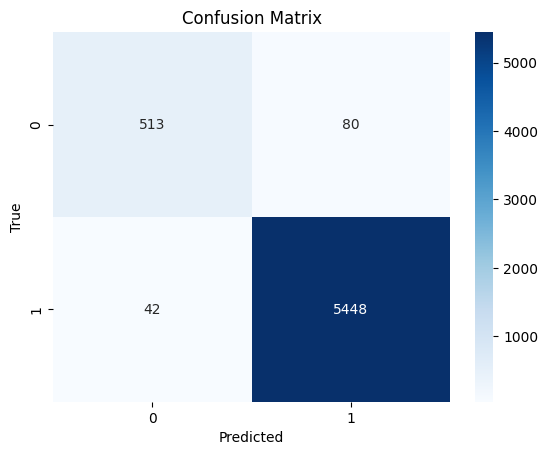

ROC AUC Score: 0.951611545750821


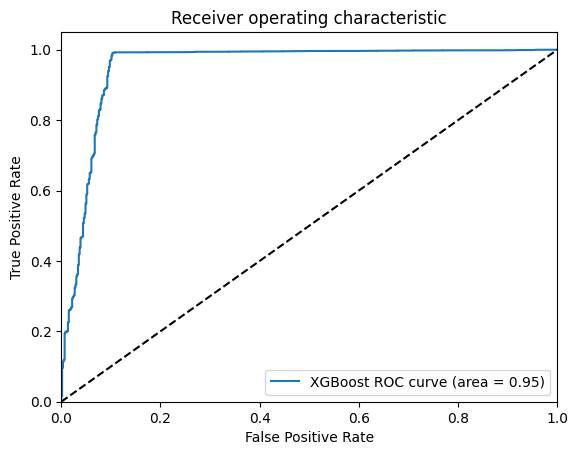

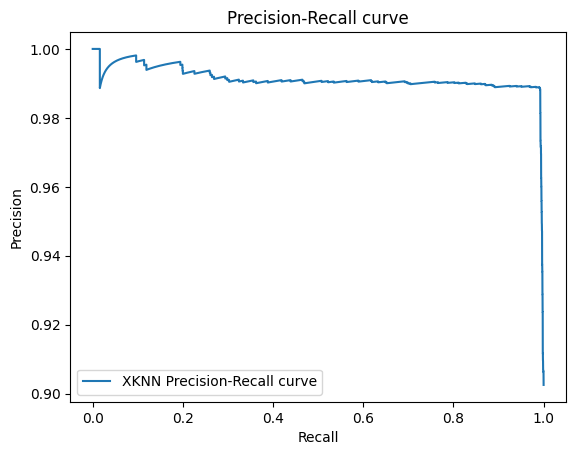

Overall Accuracy: 0.979944106526385


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
data = pd.read_csv('Sample.csv')

# Map the target variable values to 0 and 1
data['ASTHMA3'] = data['ASTHMA3'].map({1: 0, 2: 1})

# Separate the target feature
target = data['ASTHMA3']

# Remove the target feature from the dataset
data.drop('ASTHMA3', axis=1, inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

# Predict on test set
y_test_pred = knn_model.predict(X_test_scaled)

# Calculate metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)

# Print metrics
print("Testing accuracy:", test_accuracy)
print("F1 Score:", f1)
print("Sensitivity (Recall):", recall)
print("Precision:", precision)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_test_pred_proba)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
plt.plot(fpr, tpr, label='XGBoost ROC curve (area = {0:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_proba)
if len(precision) > len(recall):
    precision = precision[:-1]
elif len(recall) > len(precision):
    recall = recall[:-1]
plt.plot(recall, precision, label='XKNN Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()


# Save predictions to a CSV file
testing_data = pd.read_csv('Testing.csv')
testing_data_scaled = scaler.transform(testing_data)
testing_predictions = knn_model.predict(testing_data_scaled)
testing_results = pd.DataFrame({'ASTHMA3_Predicted': testing_predictions})
testing_results.to_csv('testing_results_knn.csv', index=False)

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test, y_test_pred)
print("Overall Accuracy:", overall_accuracy)


**Decision Tree**

Testing accuracy: 0.9613677461778728
F1 Score: 0.9785446909522506
Sensitivity (Recall): 0.9761384335154827
Precision: 0.980962840929892

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       593
           1       0.98      0.98      0.98      5490

    accuracy                           0.96      6083
   macro avg       0.88      0.90      0.89      6083
weighted avg       0.96      0.96      0.96      6083



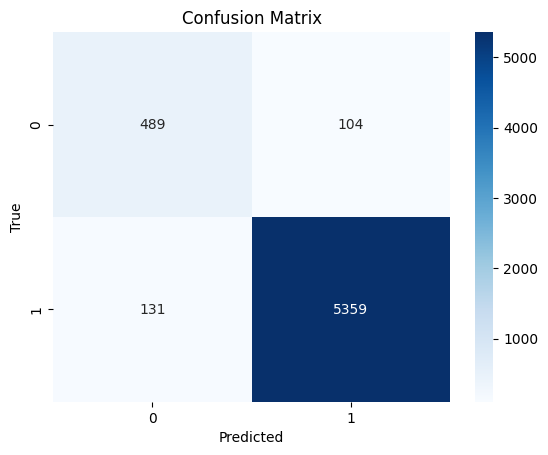

Overall Accuracy: 0.9613677461778728
ROC AUC Score: 0.900111347628833


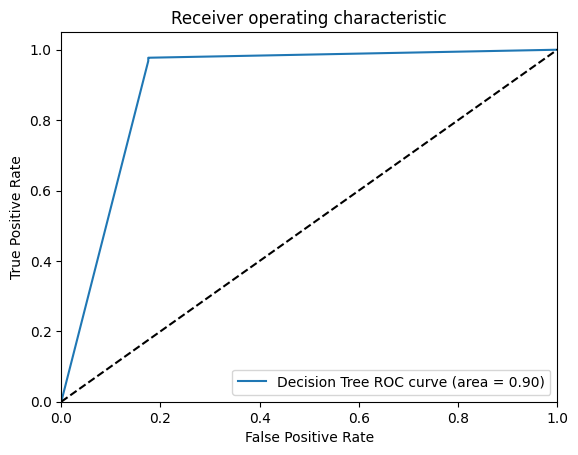

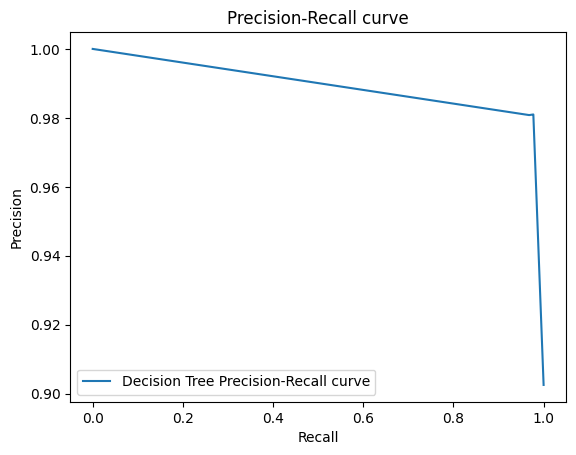

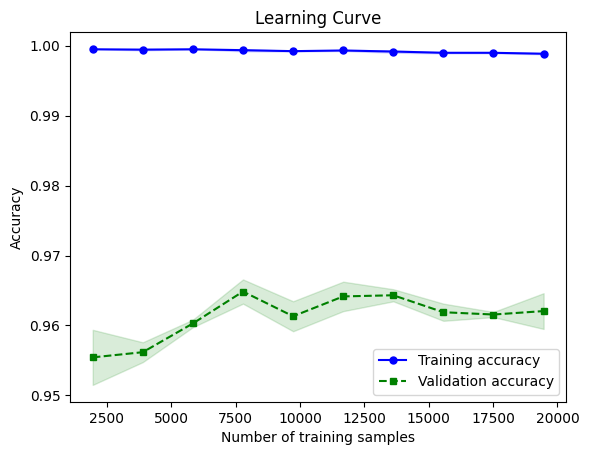


Feature Importance:
ALCDAY5: Information Gain = 0.028650825128447473
SLEPTIM1: Information Gain = 0.013936882614491629
X_AGE_G: Information Gain = 0.006847519607620646
SMOKE100: Information Gain = 0.0
SMOKDAY2: Information Gain = 0.006960442110794853
SEX: Information Gain = 0.0004739918775396071
X_HISPANC: Information Gain = 0.0025293500968855574
X_MRACE1: Information Gain = 0.008850538074078308
MARITAL: Information Gain = 0.014924287194574969
GENHLTH: Information Gain = 0.014629738787207778
HLTHPLN1: Information Gain = 6.570035720693993e-05
EDUCA: Information Gain = 0.012295452134480305
INCOME2: Information Gain = 0.02102649276657655
X_BMI5CAT: Information Gain = 0.011768902179923593
EXERANY2: Information Gain = 0.007876172653369179
ALCGRP: Information Gain = 0.002625711646314724
DRKWEEKLY: Information Gain = 0.0011139398458448837
ASTHMA4: Information Gain = 0.8340980145040057
AGE2: Information Gain = 0.0013888986102831005
AGE3: Information Gain = 0.00034468189068495765
AGE4: Informa

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
data = pd.read_csv('Sample.csv')

# Map the target variable values to 0 and 1
data['ASTHMA3'] = data['ASTHMA3'].map({1: 0, 2: 1})

# Separate the target feature
target = data['ASTHMA3']

# Remove the target feature from the dataset
data.drop('ASTHMA3', axis=1, inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Predict on test set
y_test_pred = tree_model.predict(X_test_scaled)

# Calculate metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)

# Print metrics
print("Testing accuracy:", test_accuracy)
print("F1 Score:", f1)
print("Sensitivity (Recall):", recall)
print("Precision:", precision)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test, y_test_pred)
print("Overall Accuracy:", overall_accuracy)

# Compute predicted probabilities for test set
y_test_pred_proba = tree_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_test_pred_proba)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
plt.plot(fpr, tpr, label='Decision Tree ROC curve (area = {0:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_proba)
plt.plot(recall, precision, label='Decision Tree Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

# Learning Curves
train_sizes, train_scores, test_scores = learning_curve(estimator=tree_model,
                                                        X=X_train_scaled,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5,
                                                        n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()

# Save predictions to a CSV file
testing_data = pd.read_csv('Testing.csv')
testing_data_scaled = scaler.transform(testing_data)
testing_predictions = tree_model.predict(testing_data_scaled)
testing_results = pd.DataFrame({'ASTHMA3_Predicted': testing_predictions})
testing_results.to_csv('testing_results_decision_tree.csv', index=False)

# Calculate information gain and Gini index for each feature
feature_importance = tree_model.feature_importances_

# Print feature importance
print("\nFeature Importance:")
for i, feature in enumerate(data.columns):
    print(f"{feature}: Information Gain = {feature_importance[i]}")

# Calculate Gini index for each feature
gini_index = (feature_importance * (1 - feature_importance)).sum()

# Print Gini index
print("\nGini Index:", gini_index)

**XGBOOST**

Testing accuracy: 0.9824099950682229
F1 Score: 0.9902753794419704
Sensitivity (Recall): 0.9923497267759562
Precision: 0.9882096861962634

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       593
           1       0.99      0.99      0.99      5490

    accuracy                           0.98      6083
   macro avg       0.96      0.94      0.95      6083
weighted avg       0.98      0.98      0.98      6083



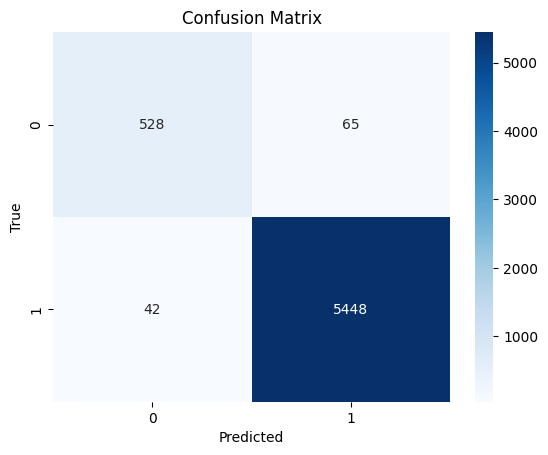

ROC AUC Score: 0.951611545750821


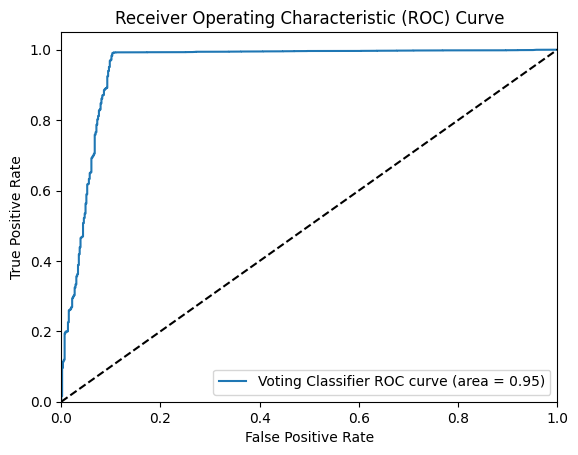

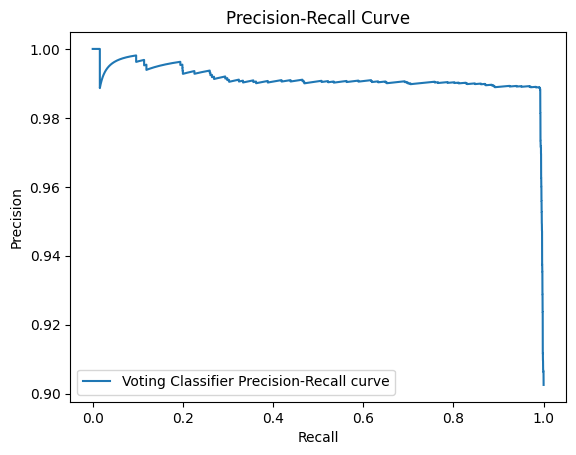

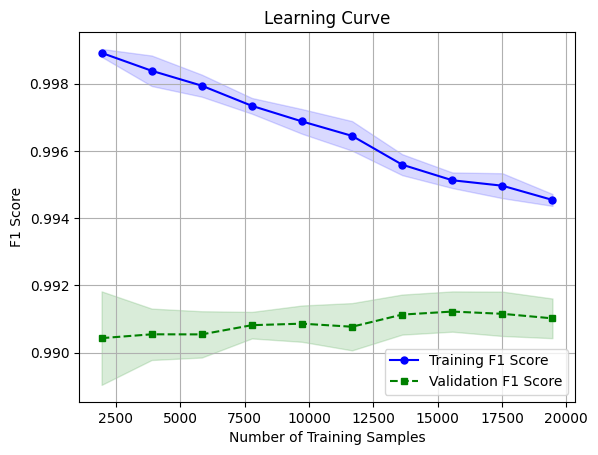

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score, roc_curve, auc, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline

# Load the dataset
data = pd.read_csv('Sample.csv')

# Map the target variable values to 0 and 1
data['ASTHMA3'] = data['ASTHMA3'].map({1: 0, 2: 1})

# Separate the target feature
target = data['ASTHMA3']

# Remove the target feature from the dataset
data.drop('ASTHMA3', axis=1, inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base classifiers
xgb_model = XGBClassifier(objective='binary:logistic', random_state=42)

# Define ensemble models
estimators = [('xgb', xgb_model)]

# Create Voting Classifier
voting_clf = VotingClassifier(estimators=estimators, voting='soft')

# Train the Voting Classifier
voting_clf.fit(X_train_scaled, y_train)

# Predict on test set
y_test_pred = voting_clf.predict(X_test_scaled)
y_test_pred_proba = voting_clf.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)

# Print metrics
print("Testing accuracy:", test_accuracy)
print("F1 Score:", f1)
print("Sensitivity (Recall):", recall)
print("Precision:", precision)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_test_pred_proba)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
plt.plot(fpr, tpr, label='Voting Classifier ROC curve (area = {0:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_proba)
plt.plot(recall, precision, label='Voting Classifier Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(estimator=voting_clf,
                                                        X=X_train_scaled,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=StratifiedKFold(n_splits=5),
                                                        scoring='f1',
                                                        n_jobs=-1)

# Calculate mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training F1 Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation F1 Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of Training Samples')
plt.ylabel('F1 Score')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.show()

# Save predictions to a CSV file
testing_data = pd.read_csv('Testing.csv')
testing_data_scaled = scaler.transform(testing_data)
testing_predictions = voting_clf.predict(testing_data_scaled)
testing_results = pd.DataFrame({'ASTHMA3_Predicted': testing_predictions})
testing_results.to_csv('testing_results_voting_classifier.csv', index=False)


Accuracy Scores:
Decision Tree: 0.96
Support Vector Machine: 0.90


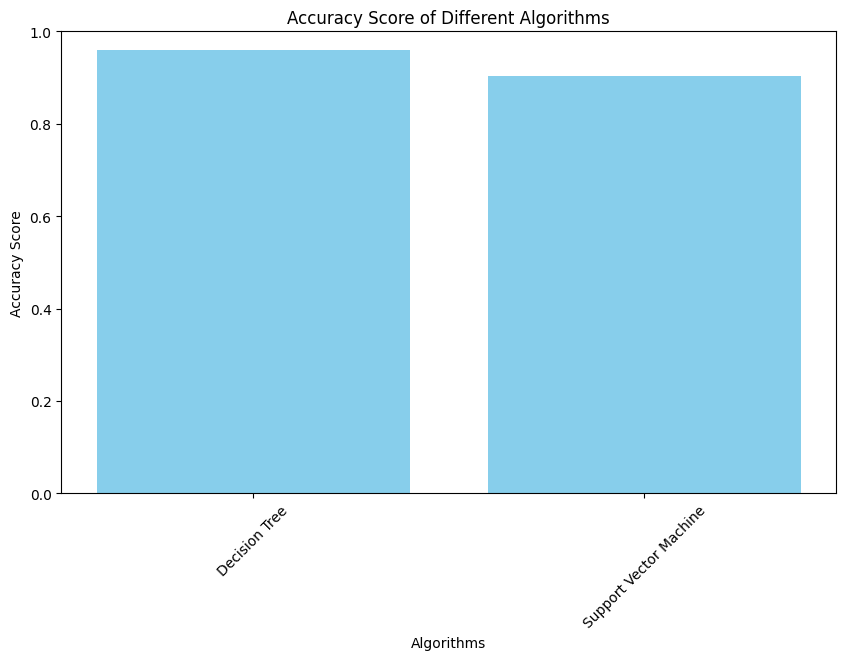

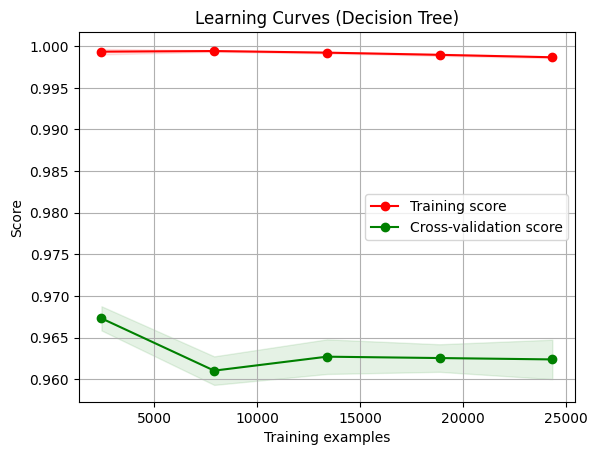

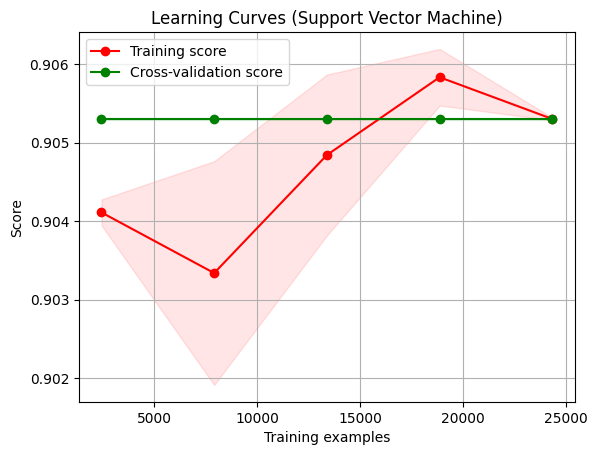

Predictions using Decision Tree:
[2 1 1 ... 1 2 2]
Predictions using Support Vector Machine:
[2 2 2 ... 2 2 2]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("Sample.csv")  # Replace "your_dataset.csv" with your dataset file

# Define features (X) and target (y)
X = data[['ALCDAY5', 'SLEPTIM1', 'X_AGE_G', 'SMOKE100', 'SMOKDAY2', 'SEX', 'X_HISPANC', 'X_MRACE1', 'MARITAL',
          'GENHLTH', 'HLTHPLN1', 'EDUCA', 'INCOME2', 'X_BMI5CAT', 'EXERANY2', 'ALCGRP', 'DRKWEEKLY', 'ASTHMA4',
          'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6', 'NEVERSMK']]
y = data['ASTHMA3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models (excluding Logistic Regression and Random Forest)
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC()
}

# Train and evaluate each model
accuracy_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy

# Print accuracy scores
print("Accuracy Scores:")
for name, accuracy in accuracy_scores.items():
    print(f"{name}: {accuracy:.2f}")

# Plot accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score of Different Algorithms')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Plot learning curves for each algorithm
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

for name, model in models.items():
    title = f"Learning Curves ({name})"
    plot_learning_curve(model, title, X, y, cv=5)
    plt.show()

# Load new data for prediction
new_data = pd.read_csv("Testing.csv")  # Replace "new_data.csv" with your new data file

# Predict asthma using each model
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(new_data)

# Display predictions
for name, prediction in predictions.items():
    print(f"Predictions using {name}:")
    print(prediction)


Accuracy Scores:
Decision Tree: 0.96
Support Vector Machine: 0.90
K-Nearest Neighbors: 0.91
XGBoost: 0.98


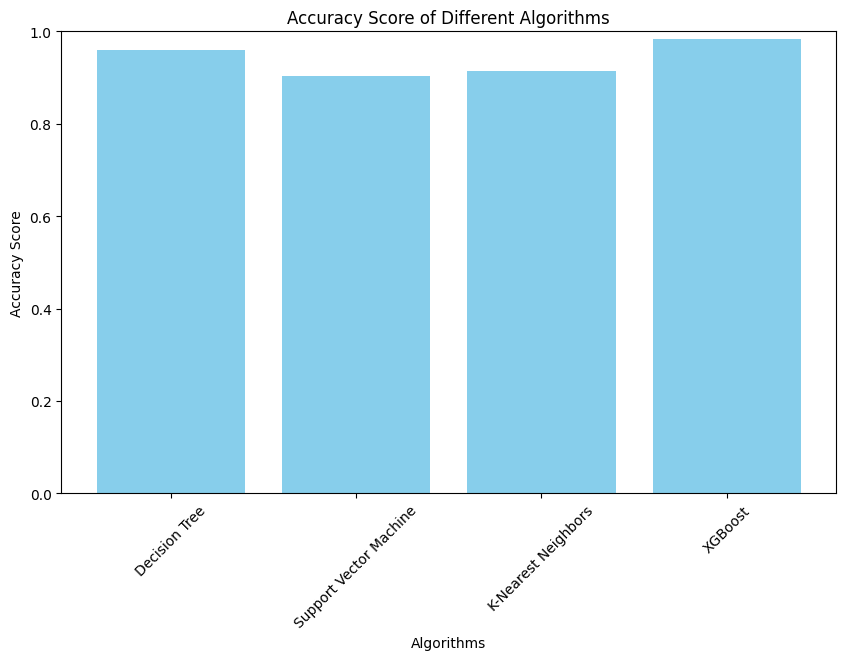

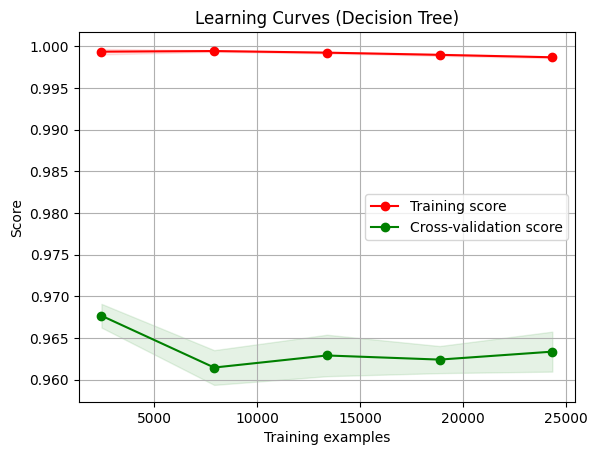

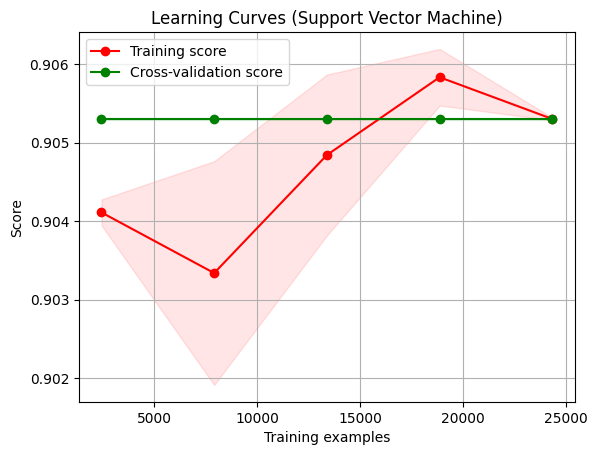

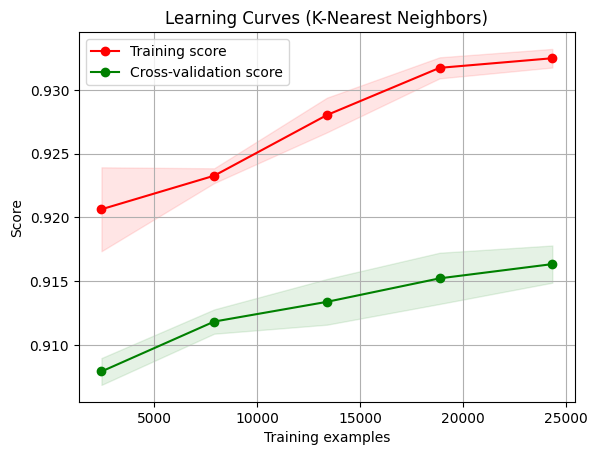

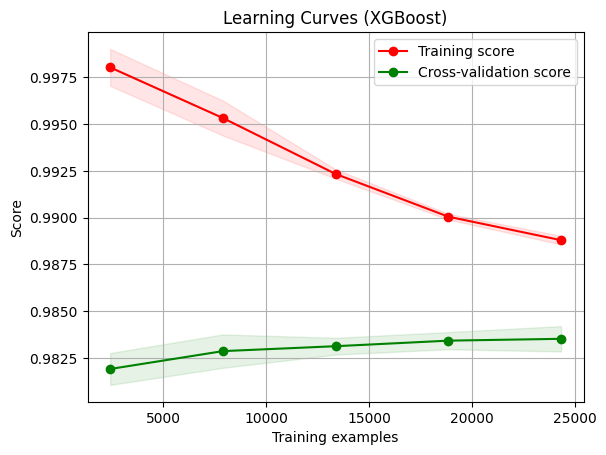

Predictions saved to predictions.csv file.
      Decision Tree  Support Vector Machine  K-Nearest Neighbors  XGBoost
0                 1                       1                    1        1
1                 0                       1                    1        0
2                 1                       1                    1        0
3                 1                       1                    1        1
4                 1                       1                    1        1
...             ...                     ...                  ...      ...
5407              1                       1                    1        1
5408              1                       1                    1        1
5409              0                       1                    1        0
5410              1                       1                    1        1
5411              1                       1                    1        1

[5412 rows x 4 columns]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("Sample.csv")  # Replace "your_dataset.csv" with your dataset file

# Define features (X) and target (y)
X = data[['ALCDAY5', 'SLEPTIM1', 'X_AGE_G', 'SMOKE100', 'SMOKDAY2', 'SEX', 'X_HISPANC', 'X_MRACE1', 'MARITAL',
          'GENHLTH', 'HLTHPLN1', 'EDUCA', 'INCOME2', 'X_BMI5CAT', 'EXERANY2', 'ALCGRP', 'DRKWEEKLY', 'ASTHMA4',
          'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6', 'NEVERSMK']]

# Preprocess the target variable y to contain only classes 0 and 1
y = data['ASTHMA3'].map({1: 0, 2: 1})  # Assuming class 1 should be mapped to 0 and class 2 should be mapped to 1


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models (including KNN and XGBoost)
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

# Train and evaluate each model
accuracy_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy

# Print accuracy scores
print("Accuracy Scores:")
for name, accuracy in accuracy_scores.items():
    print(f"{name}: {accuracy:.2f}")

# Plot accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score of Different Algorithms')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Plot learning curves for each algorithm
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

for name, model in models.items():
    title = f"Learning Curves ({name})"
    plot_learning_curve(model, title, X, y, cv=5)
    plt.show()

# Load new data for prediction
new_data = pd.read_csv("Testing.csv")  # Replace "new_data.csv" with your new data file

# Predict asthma using each model
predictions = pd.DataFrame(index=new_data.index)
for name, model in models.items():
    predictions[name] = model.predict(new_data)

# Save predictions to a CSV file
predictions.to_csv("predictions.csv", index=False)

# Display predictions
print("Predictions saved to predictions.csv file.")
print(predictions)


Model: KNN
Accuracy: 0.979944106526385
ROC AUC: 0.9414165568548671
Confusion Matrix:
 [[ 513   80]
 [  42 5448]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       593
           1       0.99      0.99      0.99      5490

    accuracy                           0.98      6083
   macro avg       0.95      0.93      0.94      6083
weighted avg       0.98      0.98      0.98      6083

Model: SVC
Accuracy: 0.9829031727765905
ROC AUC: 0.9390039225081936
Confusion Matrix:
 [[ 532   61]
 [  43 5447]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       593
           1       0.99      0.99      0.99      5490

    accuracy                           0.98      6083
   macro avg       0.96      0.94      0.95      6083
weighted avg       0.98      0.98      0.98      6083

Model: Decision Tree
Accuracy: 0.9612033536084169
ROC AUC: 0.8962038905

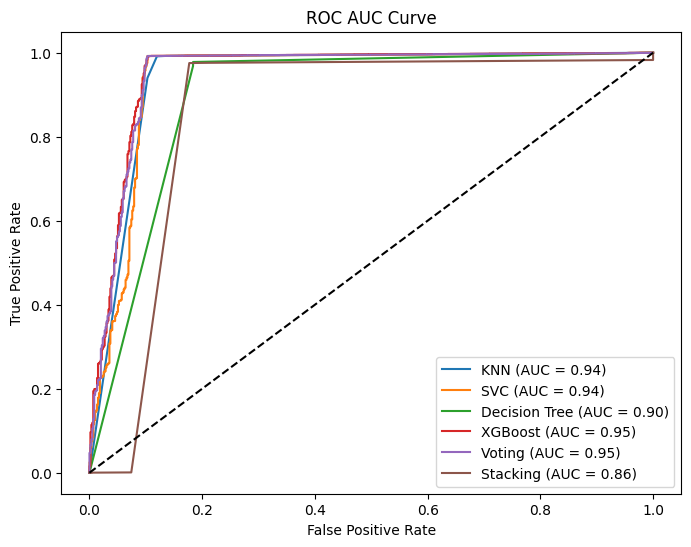

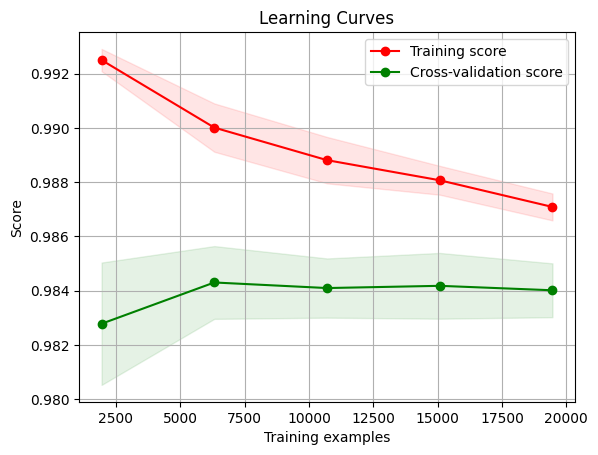

Model: KNN
Accuracy: 0.979944106526385
ROC AUC: 0.9414165568548671
Precision: 0.9795617708310742
Recall: 0.979944106526385
F1-score: 0.9796467564107437
MSE: 0.020055893473614993
Confusion Matrix:
 [[ 513   80]
 [  42 5448]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       593
           1       0.99      0.99      0.99      5490

    accuracy                           0.98      6083
   macro avg       0.95      0.93      0.94      6083
weighted avg       0.98      0.98      0.98      6083

Model: SVC
Accuracy: 0.9829031727765905
ROC AUC: 0.9390030010105758
Precision: 0.9827146571508641
Recall: 0.9829031727765905
F1-score: 0.9827854243827001
MSE: 0.0170968272234095
Confusion Matrix:
 [[ 532   61]
 [  43 5447]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       593
           1       0.99      0.99      0.99      5490

    accuracy 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.ensemble import VotingClassifier
from mlxtend.classifier import StackingClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("Sample.csv")

# Remap class labels to 0 and 1
df['ASTHMA3'] = df['ASTHMA3'].map({1: 0, 2: 1})

# Features and target variable
X = df.drop(columns=["ASTHMA3"])
y = df["ASTHMA3"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base models
knn = KNeighborsClassifier()
svc = SVC(probability=True)
dt = DecisionTreeClassifier()
xgb = XGBClassifier()

# Define ensemble methods
voting_clf = VotingClassifier(estimators=[('knn', knn), ('svc', svc), ('dt', dt), ('xgb', xgb)], voting='soft')

stacking_clf = StackingClassifier(classifiers=[knn, svc, dt, xgb], meta_classifier=svc)

# Fit models
models = [knn, svc, dt, xgb, voting_clf, stacking_clf]
model_names = ['KNN', 'SVC', 'Decision Tree', 'XGBoost', 'Voting', 'Stacking']

results = {'Model': [], 'Accuracy': [], 'ROC AUC': []}

for model, name in zip(models, model_names):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['ROC AUC'].append(roc_auc)
    print(f"Model: {name}")
    print("Accuracy:", accuracy)
    print("ROC AUC:", roc_auc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("="*50)

# Store results in a CSV file
results_df = pd.DataFrame(results)
results_df.to_csv('evaluation_metrics.csv', index=False)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
for model, name in zip(models, model_names):
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

# Plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves"
plot_learning_curve(voting_clf, title, X_train_scaled, y_train, cv=5, n_jobs=-1)
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error, confusion_matrix



results = {'Model': [], 'Accuracy': [], 'ROC AUC': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'MSE': [], 'Confusion Matrix': []}

for model, name in zip(models, model_names):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    mse = mean_squared_error(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['ROC AUC'].append(roc_auc)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-score'].append(f1)
    results['MSE'].append(mse)
    results['Confusion Matrix'].append(str(conf_matrix))

    print(f"Model: {name}")
    print("Accuracy:", accuracy)
    print("ROC AUC:", roc_auc)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("MSE:", mse)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("="*50)

# Store results in a CSV file
results_df = pd.DataFrame(results)
results_df.to_csv('evaluation_metrics.csv', index=False)




In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("Sample.csv")

# Remap class labels to 0 and 1
df['ASTHMA3'] = df['ASTHMA3'].map({1: 0, 2: 1})

# Features and target variable
X = df.drop(columns=["ASTHMA3"])
y = df["ASTHMA3"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base models
knn = KNeighborsClassifier()
svc = SVC(probability=True)
dt = DecisionTreeClassifier()
xgb = XGBClassifier()

# Define stacking classifier
stacking_clf = StackingClassifier(classifiers=[knn, svc, dt, xgb], meta_classifier=svc)

# Fit models
models = [knn, svc, dt, xgb, stacking_clf]
model_names = ['KNN', 'SVC', 'Decision Tree', 'XGBoost', 'Stacking']
for model, name in zip(models, model_names):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("="*50)


# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
for model, name in zip(models, model_names):
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

# Plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves"
plot_learning_curve(stacking_clf, title, X_train_scaled, y_train, cv=5, n_jobs=-1)
plt.show()


Model: KNN
Accuracy: 0.979944106526385
ROC AUC: 0.9414165568548671
Confusion Matrix:
 [[ 513   80]
 [  42 5448]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       593
           1       0.99      0.99      0.99      5490

    accuracy                           0.98      6083
   macro avg       0.95      0.93      0.94      6083
weighted avg       0.98      0.98      0.98      6083



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.ensemble import VotingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("Sample.csv")

# Remap class labels to 0 and 1
df['ASTHMA3'] = df['ASTHMA3'].map({1: 0, 2: 1})

# Features and target variable
X = df.drop(columns=["ASTHMA3"])
y = df["ASTHMA3"]


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base models
knn = KNeighborsClassifier()
svc = SVC(probability=True)
dt = DecisionTreeClassifier()
xgb = XGBClassifier()

# Define ensemble methods
voting_clf = VotingClassifier(estimators=[('knn', knn), ('svc', svc), ('dt', dt), ('xgb', xgb)], voting='soft')

stacking_clf = StackingClassifier(classifiers=[knn, svc, dt, xgb], meta_classifier=svc)

# Fit models
models = [knn, svc, dt, xgb, voting_clf, stacking_clf]
model_names = ['KNN', 'SVC', 'Decision Tree', 'XGBoost', 'Voting', 'Stacking']

# Print evaluation metrics and plot learning curves for each model
for model, name in zip(models, model_names):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("="*50)

    # Plot learning curve for the model
    train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train, cv=5, n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title(f'Learning Curves - {name}')
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

# Print evaluation metrics and plot learning curves for each model
for model, name in zip(models, model_names):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("="*50)

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



In [ ]:
%config NotebookApp.iopub_data_rate_limit = 10000000


In [ ]:
!pip install cryptography

In [ ]:
import random
import string
import time
# Function to generate a random input text file
def generate_input_file(filename, size):
    with open(filename, 'w') as file:
        file.write(''.join(random.choices(string.ascii_letters + string.digits, k=size)))

# Example usage: Generate a random input file named "input.txt"
generate_input_file('input.txt',75000)

# Rest of the code remains the same as before
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import hashes, hmac
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives.asymmetric import ec
from cryptography.hazmat.primitives import serialization
from cryptography.hazmat.primitives.kdf.hkdf import HKDF
import os
from cryptography.hazmat.primitives.ciphers import Cipher

# Generate ECC key pair
private_key = ec.generate_private_key(ec.SECP256R1(), default_backend())
public_key = private_key.public_key()

# Serialize public and private keys
public_key_bytes = public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
)
private_key_bytes = private_key.private_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PrivateFormat.TraditionalOpenSSL,
    encryption_algorithm=serialization.NoEncryption()
)

# Write public and private keys to files
with open("public_key.pem", "wb") as key_file:
    key_file.write(public_key_bytes)
with open("private_key.pem", "wb") as key_file:
    key_file.write(private_key_bytes)

#AES function
def encrypt_aes(key, plaintext):
    iv = os.urandom(16)  # Generate a random IV
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    encryptor = cipher.encryptor()
    ciphertext = encryptor.update(plaintext) + encryptor.finalize()
    return iv + ciphertext
# Encrypt file using AES and ECC
def encrypt_file(filename):
    with open(filename, 'rb') as file:
        plaintext = file.read()
    aes_key = os.urandom(32)  # Generate a random AES key
    shared_key = private_key.exchange(ec.ECDH(), public_key)
    derived_key = HKDF(
        algorithm=hashes.SHA256(),
        length=32,
        salt=None,
        info=b'',
        backend=default_backend()
    ).derive(shared_key)
    ciphertext = encrypt_aes(derived_key, plaintext)
    mac = calculate_hmac(derived_key, ciphertext)
    with open(filename + '.enc', 'wb') as file:
        file.write(public_key_bytes)  # Write public key for verification purposes
        file.write(ciphertext)
        file.write(mac)

#Decrypt Using AES and ECC
def decrypt_aes(key, ciphertext):
    iv = ciphertext[:16]  # Extract IV from the ciphertext
    ciphertext = ciphertext[16:]
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    decryptor = cipher.decryptor()
    plaintext = decryptor.update(ciphertext) + decryptor.finalize()
    return plaintext

# HMAC functions
def calculate_hmac(key, data):
    h = hmac.HMAC(key, hashes.SHA256(), backend=default_backend())
    h.update(data)
    return h.finalize()

def verify_hmac(key, data, mac):
    h = hmac.HMAC(key, hashes.SHA256(), backend=default_backend())
    h.update(data)
    h.verify(mac)

# Decrypt file using AES and ECC
def decrypt_file(filename):
    with open(filename, 'rb') as file:
        try:
            public_key_bytes = file.readline()  # Read the first line which contains the public key
            public_key = serialization.load_pem_public_key(
                public_key_bytes,
                backend=default_backend()
            )
            ciphertext = file.read()[:-32]  # last 32 bytes for HMAC
            mac = file.read()[-32:]  # last 32 bytes for HMAC
        except Exception as e:
            print("Error reading the file:", e)
            return
    shared_key = private_key.exchange(ec.ECDH(), public_key)
    derived_key = HKDF(
        algorithm=hashes.SHA256(),
        length=32,
        salt=None,
        info=b'',
        backend=default_backend()
    ).derive(shared_key)
    plaintext = decrypt_aes(derived_key, ciphertext)
    verify_hmac(derived_key, ciphertext, mac)
    with open(filename[:-4], 'wb') as file:
        file.write(plaintext)
    with open(filename[:-4] + '_details.txt', 'w') as details_file:
        details_file.write("Original Text:\n")
        with open(filename, 'rb') as original_file:
            original_text = original_file.read().decode('utf-8')
            details_file.write(original_text)
        details_file.write("\n\nEncrypted Text:\n")
        with open(filename + '.enc', 'rb') as encrypted_file:
            encrypted_text = encrypted_file.read().hex()
            details_file.write(encrypted_text)
        details_file.write("\n\nDecrypted Text:\n")
        decrypted_text = plaintext.decode('utf-8')
        details_file.write(decrypted_text)
        details_file.write("\n\nKeys:\n")
        details_file.write("Public Key:\n")
        details_file.write(public_key_bytes.decode('utf-8'))
        details_file.write("\nPrivate Key:\n")
        details_file.write(private_key_bytes.decode('utf-8'))

# Encrypt and decrypt the random input file
start_encryption = time.time()
encrypt_file('input.txt')
end_encryption = time.time()
encryption_time = end_encryption - start_encryption

start_decryption = time.time()
decrypt_file('input.txt.enc')
end_decryption = time.time()
decryption_time = end_decryption - start_decryption

# Print the results
print("Original Text:")
with open('input.txt', 'r') as file:
    print(file.read())

print("\nPublic Key:")
with open('public_key.pem', 'r') as file:
    print(file.read())

print("\nPrivate Key:")
with open('private_key.pem', 'r') as file:
    print(file.read())

print("\nEncrypted File Content:")
with open('input.txt.enc', 'rb') as file:
    print(file.read())

print("\nDecrypted Text:")
with open('input.txt', 'r') as file:
    print(file.read())

print("\nEncryption Time:", encryption_time, "seconds")
print("Decryption Time:", decryption_time, "seconds")


Error reading the file: Unable to load PEM file. See https://cryptography.io/en/latest/faq/#why-can-t-i-import-my-pem-file for more details. MalformedFraming
Original Text:
frwjuDdwOGzKcmqeJhAVJLfX3BxOifiXg9v88p4RmO5spBgbVUNVQCse2jVZrxMfY1afKWJ3Ttesu2xzBro8n5GzDC4i5Wp8OP6O2TxieNOm9gszLYXkDwQ3p0OaQWnndLpkuCKKELYuKP6omQkk22CIYGm3qFHKePdaOypXLHOD2PXwl2F3zP8Y873ig6SeloulolecccQbZyYd0z0TGADbAZJEagFbOBc3ndiA1Bt0snQw3G45BilswJ235y5aNdRKt5NSCJyUTuNzJy4CsuyudreuKEwQUfNCnDY9y0VnIa7wFhoZQTcZgJQIfEYH1UT795wzHkoVvODfuKiVkgB39I6oVbLiMkFpIG9EjTYqXu8sB4XitGSXXdVC2gkbnmyENnR4pxOofALo8potRA9byzdAqXyerMJ16N0FQDcjwvrTObrVirBo1Ws7rTmMYQDjFKHgMkoIDGNbih3VOHs28PTurSXEq0XPs3aVmdjv3nBJtrLrY2WMKU3GUYdI5WzviKQjPGbn5FFKtNa92ZdkJncxCLdpsFhGsZFpmzU6t623FHGJXal0TSJ7908BpTMd1ECIcJAabSBdG77ZonqksLrDF4aKxdgAI4pefxxHdoaWBM3cTBEqCbZ9yEqdgjGHc1QUYlTX218HmwEdAIygXHiXAYmKl3mqzHQhRCZRzenpKgpl45H0Ahjb7wc7CUHfIIImxWfbSSA9TxZvhxdBugd6Xu6pHsfuu2RrVCHCLj3wyizqMqLoEYxF0MopHQE3x0gmvRmDympGjggJVoZbFOauHO6xhI1UARLepWjJwoqZvrszwrmBgwc

CPU GPU

In [ ]:
pip install gputil

In [ ]:
pip install --upgrade cryptography


In [ ]:
pip uninstall cryptography
pip install cryptography


SyntaxError: invalid syntax (<ipython-input-9-115ed2538e1e>, line 1)

75k

In [ ]:
import random
import string
import time
import psutil  # Import psutil for CPU and memory usage
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import hashes, hmac
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives.asymmetric import ec
from cryptography.hazmat.primitives import serialization
from cryptography.hazmat.primitives.kdf.hkdf import HKDF
import os
from cryptography.hazmat.primitives.ciphers import Cipher

# Function to generate a random input text file
def generate_input_file(filename, size):
    with open(filename, 'w') as file:
        file.write(''.join(random.choices(string.ascii_letters + string.digits, k=size)))

# Example usage: Generate a random input file named "input.txt"
generate_input_file('input.txt', 20000)

# Generate ECC key pair
private_key = ec.generate_private_key(ec.SECP256R1(), default_backend())
public_key = private_key.public_key()

# Serialize public and private keys
public_key_bytes = public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
)
private_key_bytes = private_key.private_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PrivateFormat.TraditionalOpenSSL,
    encryption_algorithm=serialization.NoEncryption()
)

# Write public and private keys to files
with open("public_key.pem", "wb") as key_file:
    key_file.write(public_key_bytes)
with open("private_key.pem", "wb") as key_file:
    key_file.write(private_key_bytes)

# AES function
def encrypt_aes(key, plaintext):
    iv = os.urandom(16)  # Generate a random IV
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    encryptor = cipher.encryptor()
    ciphertext = encryptor.update(plaintext) + encryptor.finalize()
    return iv + ciphertext

# Encrypt file using AES and ECC
def encrypt_file(filename):
    with open(filename, 'rb') as file:
        plaintext = file.read()
    aes_key = os.urandom(32)  # Generate a random AES key
    shared_key = private_key.exchange(ec.ECDH(), public_key)
    derived_key = HKDF(
        algorithm=hashes.SHA256(),
        length=32,
        salt=None,
        info=b'',
        backend=default_backend()
    ).derive(shared_key)
    ciphertext = encrypt_aes(derived_key, plaintext)
    mac = calculate_hmac(derived_key, ciphertext)
    with open(filename + '.enc', 'wb') as file:
        file.write(public_key_bytes)  # Write public key for verification purposes
        file.write(ciphertext)
        file.write(mac)

# Decrypt Using AES and ECC
def decrypt_aes(key, ciphertext):
    iv = ciphertext[:16]  # Extract IV from the ciphertext
    ciphertext = ciphertext[16:]
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    decryptor = cipher.decryptor()
    plaintext = decryptor.update(ciphertext) + decryptor.finalize()
    return plaintext

# HMAC functions
def calculate_hmac(key, data):
    h = hmac.HMAC(key, hashes.SHA256(), backend=default_backend())
    h.update(data)
    return h.finalize()

def verify_hmac(key, data, mac):
    h = hmac.HMAC(key, hashes.SHA256(), backend=default_backend())
    h.update(data)
    h.verify(mac)

# Decrypt file using AES and ECC
def decrypt_file(filename):
    with open(filename, 'rb') as file:
        try:
            public_key_bytes = file.readline()  # Read the first line which contains the public key
            public_key = serialization.load_pem_public_key(
                public_key_bytes,
                backend=default_backend()
            )
            ciphertext = file.read()[:-32]  # last 32 bytes for HMAC
            mac = file.read()[-32:]  # last 32 bytes for HMAC
        except Exception as e:
            print("Error reading the file:", e)
            return
    shared_key = private_key.exchange(ec.ECDH(), public_key)
    derived_key = HKDF(
        algorithm=hashes.SHA256(),
        length=32,
        salt=None,
        info=b'',
        backend=default_backend()
    ).derive(shared_key)
    plaintext = decrypt_aes(derived_key, ciphertext)
    verify_hmac(derived_key, ciphertext, mac)
    with open(filename[:-4], 'wb') as file:
        file.write(plaintext)
    with open(filename[:-4] + '_details.txt', 'w') as details_file:
        details_file.write("Original Text:\n")
        with open(filename, 'rb') as original_file:
            original_text = original_file.read().decode('utf-8')
            details_file.write(original_text)
        details_file.write("\n\nEncrypted Text:\n")
        with open(filename + '.enc', 'rb') as encrypted_file:
            encrypted_text = encrypted_file.read().hex()
            details_file.write(encrypted_text)
        details_file.write("\n\nDecrypted Text:\n")
        decrypted_text = plaintext.decode('utf-8')
        details_file.write(decrypted_text)
        details_file.write("\n\nKeys:\n")
        details_file.write("Public Key:\n")
        details_file.write(public_key_bytes.decode('utf-8'))
        details_file.write("\nPrivate Key:\n")
        details_file.write(private_key_bytes.decode('utf-8'))

# Encrypt and decrypt the random input file
start_encryption = time.time()
encrypt_file('input.txt')
end_encryption = time.time()
encryption_time = end_encryption - start_encryption

start_decryption = time.time()
decrypt_file('input.txt.enc')
end_decryption = time.time()
decryption_time = end_decryption - start_decryption

# Print the results
print("Original Text:")
with open('input.txt', 'r') as file:
    print(file.read())

print("\nPublic Key:")
with open('public_key.pem', 'r') as file:
    print(file.read())

print("\nPrivate Key:")
with open('private_key.pem', 'r') as file:
    print(file.read())

print("\nEncrypted File Content:")
with open('input.txt.enc', 'rb') as file:
    print(file.read())

print("\nDecrypted Text:")
with open('input.txt', 'r') as file:
    print(file.read())

print("\nEncryption Time:", encryption_time, "seconds")
print("Decryption Time:", decryption_time, "seconds")

# Get CPU and memory usage information
cpu_percent = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / (1024 * 1024)  # Memory usage in MB

print("\nCPU Usage:", cpu_percent, "%")
print("Memory Usage:", memory_usage, "MB")


Error reading the file: Unable to load PEM file. See https://cryptography.io/en/latest/faq/#why-can-t-i-import-my-pem-file for more details. MalformedFraming
Original Text:
X1wVfl0sa0u4wtkGDyPyOu6eDOD4RBotWVQuTf1eFyUGZerIhBWxvSSzKhzxZh6STQ0007olEnmx3rl0Xk9cq3KA0gAenQ4LPhqo7KmNyCS1YqPb3Ja6JK3kJe0kaaVyP3xQgFgNG9uuuYEqwezmxKI9zb7XJ5muz0DJSNefovl3kpO4mGNicOZ5h0YPNo19FScDiyMWmuqjDlcJPUqAZB5w63rr9rKRFQDUEsCE2qfmBWnZtE7wz2lBjskYpyFmOlyNF3eZT8FpqMu8iO4iWmxkhJS3p0UOiUDl89k62y3mLSN1xr1KIcn8TRWa1EFkxh7wRJATE7vc7WcFl9KzUnNkDZAPk2sxuACpHG1XxaPe93c1yqwihpbK3UdetB8UvrGcx7xDsz57WmAjoKTkHN2gnRJQ4Y8HaQshWXP7U8jqtIui0hWXQxBNEfvjyPXCRPbmqK8dMUjnXKiG7NpvN4hcEuu8tbH03TEFkG74NJVTesoDgVlhCOHqHJwuAVi13kOacEtCpQ1z1GVad9sMTvi0xJSMdym9hr6YsTqrCzKtRf1QytsU7EUx6ZMe6bjqS2P2E4qyCiELEvQ2H1JzlqEGSYtHztfErZcKEws4xGnJ2ynVYQO4TOAYTJqIYkXgFReQsOHrIs8eCAXrcXyOZeE7nWBS20X6PIQQxUeGcf94qhCwzvxE118HbJzBcT7wNzf5TVTHI1thUyLt0jGNpyGkn0oR5TiHZqS53JuV5K1VFc2UQA8PC6d0E1BlxTTo4OK6al8CoYLuJaPnq5xA3ukoHRrB7imvE68XZOevgqaEuakOo5LDvYIqkyI

runing time

In [ ]:
import random
import string
import time
import psutil  # Import psutil for CPU and memory usage
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import hashes, hmac
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives.asymmetric import ec
from cryptography.hazmat.primitives import serialization
from cryptography.hazmat.primitives.kdf.hkdf import HKDF
import os
from cryptography.hazmat.primitives.ciphers import Cipher

# Function to generate a random input text file
def generate_input_file(filename, size):
    with open(filename, 'w') as file:
        file.write(''.join(random.choices(string.ascii_letters + string.digits, k=size)))

# Example usage: Generate a random input file named "input.txt"
generate_input_file('input.txt', 20000)

# Generate ECC key pair
private_key = ec.generate_private_key(ec.SECP256R1(), default_backend())
public_key = private_key.public_key()

# Serialize public and private keys
public_key_bytes = public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
)
private_key_bytes = private_key.private_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PrivateFormat.TraditionalOpenSSL,
    encryption_algorithm=serialization.NoEncryption()
)

# Write public and private keys to files
with open("public_key.pem", "wb") as key_file:
    key_file.write(public_key_bytes)
with open("private_key.pem", "wb") as key_file:
    key_file.write(private_key_bytes)

# AES function
def encrypt_aes(key, plaintext):
    iv = os.urandom(16)  # Generate a random IV
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    encryptor = cipher.encryptor()
    ciphertext = encryptor.update(plaintext) + encryptor.finalize()
    return iv + ciphertext

# Encrypt file using AES and ECC
def encrypt_file(filename):
    with open(filename, 'rb') as file:
        plaintext = file.read()
    aes_key = os.urandom(32)  # Generate a random AES key
    shared_key = private_key.exchange(ec.ECDH(), public_key)
    derived_key = HKDF(
        algorithm=hashes.SHA256(),
        length=32,
        salt=None,
        info=b'',
        backend=default_backend()
    ).derive(shared_key)
    ciphertext = encrypt_aes(derived_key, plaintext)
    mac = calculate_hmac(derived_key, ciphertext)
    with open(filename + '.enc', 'wb') as file:
        file.write(public_key_bytes)  # Write public key for verification purposes
        file.write(ciphertext)
        file.write(mac)

# Decrypt Using AES and ECC
def decrypt_aes(key, ciphertext):
    iv = ciphertext[:16]  # Extract IV from the ciphertext
    ciphertext = ciphertext[16:]
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    decryptor = cipher.decryptor()
    plaintext = decryptor.update(ciphertext) + decryptor.finalize()
    return plaintext

# HMAC functions
def calculate_hmac(key, data):
    h = hmac.HMAC(key, hashes.SHA256(), backend=default_backend())
    h.update(data)
    return h.finalize()

def verify_hmac(key, data, mac):
    h = hmac.HMAC(key, hashes.SHA256(), backend=default_backend())
    h.update(data)
    h.verify(mac)

# Decrypt file using AES and ECC
def decrypt_file(filename):
    with open(filename, 'rb') as file:
        try:
            public_key_bytes = file.readline()  # Read the first line which contains the public key
            public_key = serialization.load_pem_public_key(
                public_key_bytes,
                backend=default_backend()
            )
            ciphertext = file.read()[:-32]  # last 32 bytes for HMAC
            mac = file.read()[-32:]  # last 32 bytes for HMAC
        except Exception as e:
            print("Error reading the file:", e)
            return
    shared_key = private_key.exchange(ec.ECDH(), public_key)
    derived_key = HKDF(
        algorithm=hashes.SHA256(),
        length=32,
        salt=None,
        info=b'',
        backend=default_backend()
    ).derive(shared_key)
    plaintext = decrypt_aes(derived_key, ciphertext)
    verify_hmac(derived_key, ciphertext, mac)
    with open(filename[:-4], 'wb') as file:
        file.write(plaintext)
    with open(filename[:-4] + '_details.txt', 'w') as details_file:
        details_file.write("Original Text:\n")
        with open(filename, 'rb') as original_file:
            original_text = original_file.read().decode('utf-8')
            details_file.write(original_text)
        details_file.write("\n\nEncrypted Text:\n")
        with open(filename + '.enc', 'rb') as encrypted_file:
            encrypted_text = encrypted_file.read().hex()
            details_file.write(encrypted_text)
        details_file.write("\n\nDecrypted Text:\n")
        decrypted_text = plaintext.decode('utf-8')
        details_file.write(decrypted_text)
        details_file.write("\n\nKeys:\n")
        details_file.write("Public Key:\n")
        details_file.write(public_key_bytes.decode('utf-8'))
        details_file.write("\nPrivate Key:\n")
        details_file.write(private_key_bytes.decode('utf-8'))

# Measure total running time
start_time = time.time()

# Encrypt and decrypt the random input file
start_encryption = time.time()
encrypt_file('input.txt')
end_encryption = time.time()
encryption_time = end_encryption - start_encryption

start_decryption = time.time()
decrypt_file('input.txt.enc')
end_decryption = time.time()
decryption_time = end_decryption - start_decryption

# Print the results
print("Original Text:")
with open('input.txt', 'r') as file:
    print(file.read())

print("\nPublic Key:")
with open('public_key.pem', 'r') as file:
    print(file.read())

print("\nPrivate Key:")
with open('private_key.pem', 'r') as file:
    print(file.read())

print("\nEncrypted File Content:")
with open('input.txt.enc', 'rb') as file:
    print(file.read())

print("\nDecrypted Text:")
with open('input.txt', 'r') as file:
    print(file.read())

print("\nEncryption Time:", encryption_time, "seconds")
print("Decryption Time:", decryption_time, "seconds")

# Get CPU and memory usage information
cpu_percent = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / (1024 * 1024)  # Memory usage in MB

print("\nCPU Usage:", cpu_percent, "%")
print("Memory Usage:", memory_usage, "MB")

# Calculate and print total running time
end_time = time.time()
total_time = end_time - start_time
print("\nTotal Running Time:", total_time, "seconds")


Error reading the file: Unable to load PEM file. See https://cryptography.io/en/latest/faq/#why-can-t-i-import-my-pem-file for more details. MalformedFraming
Original Text:
yWDkbgKYHrOD7IWaBteqoXSuhcIaQ85IImtxIDVBLWQbwsAhkU4B45B3LIBg0hShasVPp403qNbRmWsy4Hk82cGLvB0YwAobQ50lbvlTCD0RhTGm8UAqT4mxfYKz5QRoSPSdkx0uz0Cc8psbLylIFigC07XhYSyLNX5qGKzy0PTrYAaneEsB0mLFMR8ZvXvZbitstUwLpPFGWszxLc56eQ7TRgULimwHWlb40PuAwUkbE7SNjzDYYwFrqhTysvS9UzGglhXLdy8HScouwvNH1VjMvEh4HaeiuKKXgvPPyO7pYxeT59d5OavhIltObloj40HCQ23evIE41cneHUwPXrB4eyT9YdXKU8H5roaMJlL6gusUNpXac8OpaqxCRYrHnbYE43kCFZFuVaLjLek4g8Rxr6yD1kQ8xDRiUfmsz6ppjdEVMYeFLOw2LY7DhwcCNnt4qoizpIKXkVD3rQDed1AOOspquWDBYXR7hzc4fGQnucSzWaSAFEki33PlNuvmtu6ep9Qt2DCtg4dSB0sZ2rNq6SSjO5CFWwHFMHJLm3golwOcjXyQ2RpMMoQBI9NcaTiwjW4csMzKNF8VRpRCAoXwdRZOkdTMra2Djph8YcXHPFyzmbdyt1Ir9GsVIiHHTyUXdPT2YqgPc7TsUKy1LiX6aMCb4f5BFF0uYeUSung8KdhHBOgMa2gE5C5rWnzc9JO54ZhsIuRbc53zDWboteOySn9PEEsTHCSz53StbHl0n1fRsB4gXp1bJCOe6UoInG5yDbp4AmoH1aw7ZGQhHNGkiDP54FX9pVjF9IAjgjrf8bWeemzcxChbIMl

In [ ]:
# Decrypt file using AES and ECC
def decrypt_file(filename):
    decrypted_file_path = None  # Initialize to None
    with open(filename, 'rb') as file:
        try:
            public_key_bytes = file.readline()  # Read the first line which contains the public key
            public_key = serialization.load_pem_public_key(
                public_key_bytes,
                backend=default_backend()
            )
            ciphertext = file.read()[:-32]  # last 32 bytes for HMAC
            mac = file.read()[-32:]  # last 32 bytes for HMAC
        except Exception as e:
            print("Error reading the file:", e)
            return decrypted_file_path  # Return None in case of an error
    shared_key = private_key.exchange(ec.ECDH(), public_key)
    derived_key = HKDF(
        algorithm=hashes.SHA256(),
        length=32,
        salt=None,
        info=b'',
        backend=default_backend()
    ).derive(shared_key)
    plaintext = decrypt_aes(derived_key, ciphertext)
    verify_hmac(derived_key, ciphertext, mac)

    # Write decrypted plaintext to a temporary file
    decrypted_file_path = 'temp_decrypted.txt'
    with open(decrypted_file_path, 'wb') as file:
        file.write(plaintext)

    return decrypted_file_path

# Measure total running time
start_time = time.time()

# Encrypt and decrypt the random input file
encrypt_file('input.txt')
decrypted_file = decrypt_file('input.txt.enc')

if decrypted_file:
    # Read original plaintext
    with open('input.txt', 'r') as file:
        original_text = file.read()

    # Read decrypted plaintext
    with open(decrypted_file, 'r') as file:
        decrypted_text = file.read()

    # Calculate accuracy
    accuracy = (original_text == decrypted_text)

    # Print accuracy
    print("Accuracy:", accuracy)

    # Delete temporary decrypted file
    os.remove(decrypted_file)
else:
    print("Decryption failed.")

# Calculate and print total running time
end_time = time.time()
total_time = end_time - start_time
print("\nTotal Running Time:", total_time, "seconds")


Error reading the file: Unable to load PEM file. See https://cryptography.io/en/latest/faq/#why-can-t-i-import-my-pem-file for more details. MalformedFraming
Decryption failed.

Total Running Time: 0.014320135116577148 seconds
